<font color='green'><center><h1> Machine Learning-Driven Approach for Enhancing Funding Success in Educational Projects </h1></center>

<font color='purple'><center><h1> Table of Contents </h1></center>

### Table of Contents

* [Import Libraries/Dataset](#chapter1)
* [Data Visualization and Exploration](#chapter2)
    * [Explore the Dataset](#section_2_1)
    * [Univariate Analysis](section_2_2)
* [Data Preparation](#chapter3) 
    * [Data Cleaning](#section_3_1)
    * [Encoding](#section_3_2)
        * [Pre-Encoding Analysis](#section_3_2_1)
        * [Create Functions for Encoding](#section_3_2_2)
        * [Applying Encoding for Selected Variables](#section_3_2_3)
    * [Train/Test Split](section_3_3)
    * [Normalization Pipeline](section_3_4)
    * [Case 1: BoW Vectorization](section_3_5)
        * [Title word Frequency generation with Train data](#section_3_5_1)
        * [Title Vectorization Pipeline](#section_3_5_2)
        * [Verify Title Vectorization](#section_3_5_3)
        * [Essay word Frequency generation with Train data](#section_3_5_4)
        * [Essay Vectorization Pipeline](#section_3_5_5)
        * [Verify Essay Vectorization](#section_3_5_6)
        * [Train data Vectorization (X_train_BoW)](#section_3_5_7)
        * [Test data Vectorization (X_test_BoW)](#section_3_5_8)
    * [Case 2: TF-IDF Vectorization](#section_3_6)
        * [TF-IDF Column Conversions](#section_3_6_1)
        * [TF-IDF Calculations](#section_3_6_2)
        * [TF-IDF Train Data Set-up (X_train_TFIDF)](#section_3_6_3)
        * [Test data Vectorization (X_test_TFIDF)](#section_3_6_4)
* [Case 1: Model Building and Performance Evaluation - BoW](#chapter4)
    * [Model Building - BoW](#section_4_1)
    * [Performance Evaluation - BoW](#section_4_2)
    * [Confusion Matrix - BoW](#section_4_3)
    * [Decision Tree Model Visualization - BoW](#section_4_4)
    * [Visualize AUC Curve - BoW](#section_4_5)
    * [Hyperparameter Tuning - BoW](#section_4_6)
* [Case 2: Model Building and Performance Evaluation - TF-IDF](#chapter5)
    * [Model Building - TF-IDF](#section_5_1)
    * [Performance Evaluation - TF-IDF](#section_5_2)
    * [Confusion Matrix - TF-IDF](#section_5_3)
    * [Decision Tree Model Visualization - TF-IDF](#section_5_4)
    * [Visualize AUC Curve - TF-IDF](#section_5_5)
    * [Hyperparameter Tuning - TF-IDF](#section_5_6)
    * [Find Features with Non-Zero Importance](#section_5_7)
    * [Model Building and Evaluation - TF-IDF - Non-Zero Features](#section_5_8)
    * [Hyperparameter Tuning - TF-IDF - Non-zero Features](#section_5_9) 
* [Tabulate Results and Observations](#chapter6)

<a class="anchor" id="chapter1"></a>

<font color='purple'><center><h1> Import Libraries/Dataset </h1></center>

In [183]:
# importing the packages necessary for this assignment problem

import re
import time
import numpy as np
import pandas as pd
import math
import nltk
import heapq

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#for decision tree object
from sklearn.tree import DecisionTreeClassifier
#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix
#for visualizing tree 
from sklearn.tree import plot_tree

from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency
from skfeature.function.similarity_based import fisher_score

from feature_selector import FeatureSelector

import statsmodels.api as sm

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import AutoLocator, MaxNLocator, LinearLocator, MultipleLocator, FixedLocator, NullLocator
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Import other useful subpackage
from sklearn.metrics import accuracy_score

# and we want to view the charts inline
%matplotlib inline

ModuleNotFoundError: No module named 'feature_selector'

In [4]:
df_init = pd.read_csv("Preprocessed_DonorsChoose_dataset.csv")

<a class="anchor" id="chapter2"></a>

<font color='purple'><center><h1> Data Visualization and Exploration </h1></center>

<a class="anchor" id="section_2_1"></a>

<font color='blue'><center><h2> Explore the Dataset </h2></center>

In [5]:
df_init.head(3)

id teacher_prefix school_state project_grade_category  \
0  p253737            mrs           in          grades_prek_2   
1  p258326             mr           fl             grades_6_8   
2  p182444             ms           az             grades_6_8   

     project_subject_categories project_subject_subcategories  \
0             literacy_language                  esl_literacy   
1  history_civics_health_sports  civics_government_teamsports   
2                 health_sports    health_wellness_teamsports   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                             0                    0  154.60   
1                                             7                    1  299.00   
2                                             1                    0  516.85   

   quantity                                   cleaned_titles  \
0        23        educational support english learners home   
1         1                 wanted projector hungry learners   
2        22  soccer equipment awesome middle school students   

                                      cleaned_essays  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   
2  true champions not always ones win guts mia ha...   

                                     cleaned_summary  isdigit_summary  
0  students_need_opportunities_practice_beginning...                0  
1  students_need_projector_help_viewing_education...                0  
2  students_need_shine_guards_athletic_socks_socc...                0

In [6]:
# Display info regarding the Dataset
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            109248 non-null  object 
 1   teacher_prefix                                109248 non-null  object 
 2   school_state                                  109248 non-null  object 
 3   project_grade_category                        109248 non-null  object 
 4   project_subject_categories                    109248 non-null  object 
 5   project_subject_subcategories                 109248 non-null  object 
 6   teacher_number_of_previously_posted_projects  109248 non-null  int64  
 7   project_is_approved                           109248 non-null  int64  
 8   price                                         109248 non-null  float64
 9   quantity                                      10

In [175]:
# Describe the dataset
df_init.describe()

teacher_number_of_previously_posted_projects  project_is_approved  \
count                                 109205.000000        109205.000000   
mean                                      11.151815             0.848679   
std                                       27.773733             0.358363   
min                                        0.000000             0.000000   
25%                                        0.000000             1.000000   
50%                                        2.000000             1.000000   
75%                                        9.000000             1.000000   
max                                      451.000000             1.000000   

               price       quantity  isdigit_summary  
count  109205.000000  109205.000000    109205.000000  
mean      298.126701      16.965450         0.144224  
std       367.518882      26.186492         0.351318  
min         0.660000       1.000000         0.000000  
25%       104.330000       4.000000         0.000000  
50%       206.220000       9.000000         0.000000  
75%       379.000000      21.000000         0.000000  
max      9999.000000     930.000000         1.000000

In [7]:
# Look at the distribution of target variable
df_init['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

<b><u> Inference: </b></u> This is an imbalanced dataset. It seems that most projects get approved.

<a class="anchor" id="section_2_2"></a>

<font color='blue'><center><h2> Univariate Analysis </h2></center>

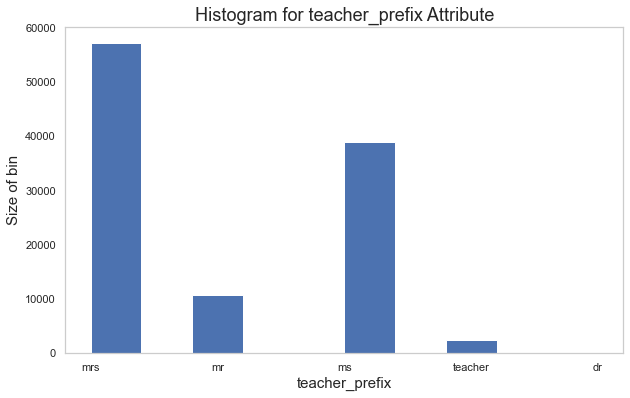

In [176]:
# Plot the histogram for the Year attribute to observe distribution
# We are doing this so that we can decide how to apply the discretization sensibly

# histogram of the raw data
fig_hist1, ax_hist1 = plt.subplots(figsize=(10,6))
# Set gridline off
ax_hist1.grid(False)

plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('font', size=7)          # controls default text sizes

plt.hist(df_init['teacher_prefix'])
#plt.scatter(df_init['teacher_prefix'],df_init['isdigit_summary'])
plt.xlabel("teacher_prefix", fontsize=15)
plt.ylabel("Size of bin", fontsize=15)
plt.title("Histogram for teacher_prefix Attribute", fontsize=18)

plt.show()

In [177]:
df_tp_apprvd = df_init[df_init['project_is_approved'] == 1]
tp_count = df_tp_apprvd['teacher_prefix'].value_counts().rename_axis('teacher_prefix').to_frame('Count')
tp_count.reset_index(level=0, inplace=True)
tp_count

teacher_prefix  Count
0            mrs  48986
1             ms  32853
2             mr   8956
3        teacher   1876
4             dr      9

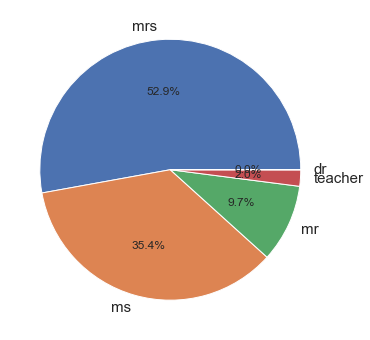

In [178]:
fig_bitp, ax_bitp = plt.subplots(figsize=(17,6))
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('font', size=12)          # controls default text sizes
w_bitp, l_bitp, v_bitp = ax_bitp.pie(x='Count', labels='teacher_prefix', data=tp_count, autopct='%1.1f%%')

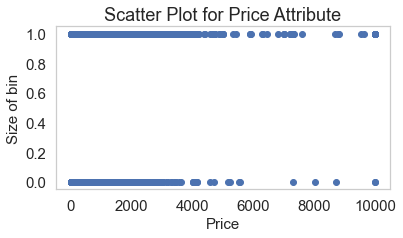

In [179]:
# Scatter Plot of the raw data
fig_price, ax_price = plt.subplots(figsize=(6,3))
# Set gridline off
ax_price.grid(False)

plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('font', size=7)          # controls default text sizes

plt.scatter(df_init['price'],df_init['project_is_approved'])
plt.xlabel("Price", fontsize=15)
plt.ylabel("Size of bin", fontsize=15)
plt.title("Scatter Plot for Price Attribute", fontsize=18)

plt.show()

In [180]:
df_state_apprvd = df_init[df_init['project_is_approved'] == 1]
state_count = df_state_apprvd['school_state'].value_counts().rename_axis('school_state').to_frame('Count')
state_count.reset_index(level=0, inplace=True)
state_count.head(10)

school_state  Count
0           ca  13203
1           ny   6288
2           tx   6013
3           fl   5143
4           nc   4350
5           il   3703
6           sc   3384
7           ga   3325
8           mi   2672
9           pa   2658

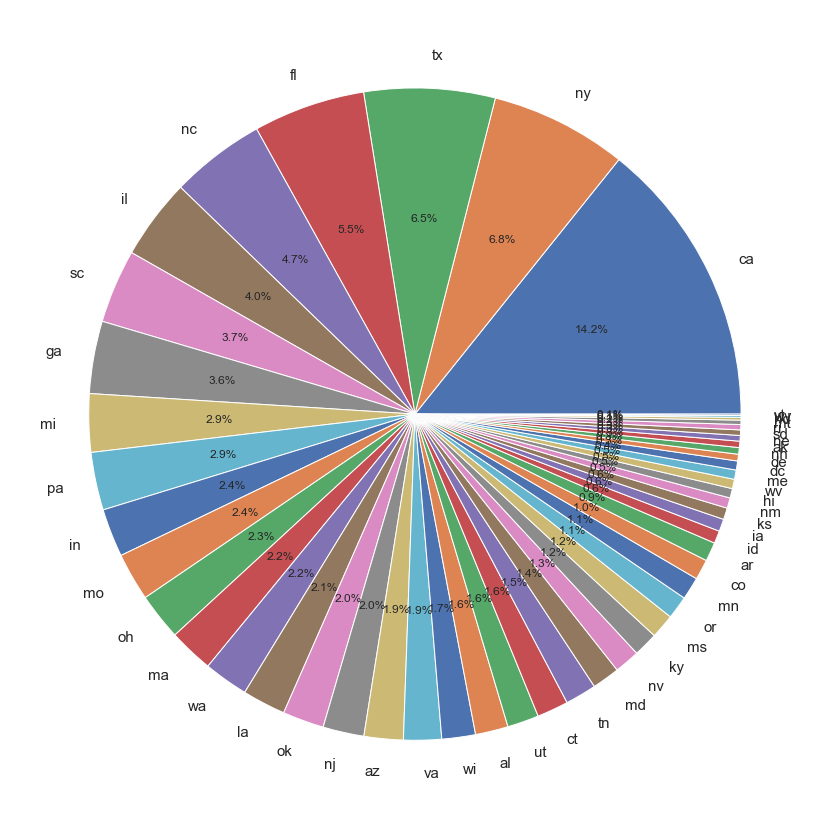

In [181]:
fig_state_apprvd, ax_state_apprvd = plt.subplots(figsize=(40,15))
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('font', size=12)          # controls default text sizes
w_state_apprvd, l_state_apprvd, v_state_apprvd = ax_state_apprvd.pie(x='Count', labels='school_state', data=state_count, autopct='%1.1f%%')

<a class="anchor" id="chapter3"></a>

<font color='purple'><center><h1> Data Preparation </h1></center>

<a class="anchor" id="section_3_1"></a>

<font color='blue'><center><h2> Data Cleaning </h2></center>

In [8]:
# Removing nan
df_init.columns[df_init.isna().any()].tolist()

['cleaned_titles']

In [9]:
df_init.isnull().sum()

id                                               0
teacher_prefix                                   0
school_state                                     0
project_grade_category                           0
project_subject_categories                       0
project_subject_subcategories                    0
teacher_number_of_previously_posted_projects     0
project_is_approved                              0
price                                            0
quantity                                         0
cleaned_titles                                  43
cleaned_essays                                   0
cleaned_summary                                  0
isdigit_summary                                  0
dtype: int64

In [10]:
df_init = df_init.dropna()

In [11]:
df_init.isnull().sum()

id                                              0
teacher_prefix                                  0
school_state                                    0
project_grade_category                          0
project_subject_categories                      0
project_subject_subcategories                   0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
price                                           0
quantity                                        0
cleaned_titles                                  0
cleaned_essays                                  0
cleaned_summary                                 0
isdigit_summary                                 0
dtype: int64

In [12]:
df_init.head(3)

id teacher_prefix school_state project_grade_category  \
0  p253737            mrs           in          grades_prek_2   
1  p258326             mr           fl             grades_6_8   
2  p182444             ms           az             grades_6_8   

     project_subject_categories project_subject_subcategories  \
0             literacy_language                  esl_literacy   
1  history_civics_health_sports  civics_government_teamsports   
2                 health_sports    health_wellness_teamsports   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                             0                    0  154.60   
1                                             7                    1  299.00   
2                                             1                    0  516.85   

   quantity                                   cleaned_titles  \
0        23        educational support english learners home   
1         1                 wanted projector hungry learners   
2        22  soccer equipment awesome middle school students   

                                      cleaned_essays  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   
2  true champions not always ones win guts mia ha...   

                                     cleaned_summary  isdigit_summary  
0  students_need_opportunities_practice_beginning...                0  
1  students_need_projector_help_viewing_education...                0  
2  students_need_shine_guards_athletic_socks_socc...                0

<a class="anchor" id="section_3_2"></a>

<font color='blue'><center><h2> Encoding </h2></center>

<a class="anchor" id="section_3_2_1"></a>

<font color='orange'><center><h2> Pre-Encoding Analysis </h2></center>

<b><u> Remarks: </b></u> Since we are going to be using a Decision Tree Classifier with sklearn, all the features have to be either continuous or encoded. 
    Thus, we will pick the relevant features and discard the rest to prevent unnecessary computations.

In [13]:
# Look at teacher prefixes
df_init['teacher_prefix'].value_counts()

mrs        57248
ms         38943
mr         10643
teacher     2358
dr            13
Name: teacher_prefix, dtype: int64

<b><u> Inference: </b></u> This column can be removed from analysis. Splits on this column does not add business value.

In [14]:
# Look at school_state
df_init['school_state'].value_counts()

ca    15382
tx     7392
ny     7315
fl     6183
nc     5088
il     4342
ga     3957
sc     3934
mi     3161
pa     3109
in     2620
mo     2576
oh     2466
la     2394
ma     2388
wa     2334
ok     2275
nj     2237
az     2146
va     2045
wi     1825
al     1760
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      342
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

<b><u> Inference: </b></u> This column can be split into 51 classes. 

In [15]:
# Look at project_grade_category
df_init['project_grade_category'].value_counts()

grades_prek_2    44208
grades_3_5       37122
grades_6_8       16914
grades_9_12      10961
Name: project_grade_category, dtype: int64

<b><u> Inference: </b></u> This column can be divided into 3 proper categories. 
    We can use label encoding as the different classes are ordinal.

In [16]:
# Look at project_subject_categories
df_init['project_subject_categories'].value_counts()

literacy_language                       23646
math_science                            17068
literacy_language_math_science          14630
health_sports                           10174
music_arts                               5177
specialneeds                             4224
literacy_language_specialneeds           3957
appliedlearning                          3770
math_science_literacy_language           2289
appliedlearning_literacy_language        2190
history_civics                           1849
math_science_specialneeds                1840
literacy_language_music_arts             1757
math_science_music_arts                  1642
appliedlearning_specialneeds             1467
history_civics_literacy_language         1418
health_sports_specialneeds               1391
warmth_care_hunger                       1309
math_science_appliedlearning             1220
appliedlearning_math_science             1051
literacy_language_history_civics          809
health_sports_literacy_language   

<b><u> Inference: </b></u> This column can be split into 38 classes. 
    First 37 subclasses have counts > 50 and the other class can be a bucket class to catch the rest of the categories.

In [17]:
# Look at project_subject_subcategories

# Create a DataFrame by taking cumulative value counts
df_proj_subcats_count = pd.DataFrame(df_init['project_subject_subcategories'].value_counts())
# Convert index into a column
df_proj_subcats_count['Project_Subcategories'] = df_proj_subcats_count.index
# Convert index into numbers - reset without adding a new column to preserve old index
df_proj_subcats_count = df_proj_subcats_count.reset_index(drop=True) 
# Rename column with counts
df_proj_subcats_count = df_proj_subcats_count.rename(columns={"project_subject_subcategories":"Counts"})
df_proj_subcats_count.tail(3)

Counts                 Project_Subcategories
398       1    communityservice_financialliteracy
399       1  history_geography_warmth_care_hunger
400       1     extracurricular_financialliteracy

In [18]:
# Check how many classes have counts > threshold
df_proj_subcats_count[(df_proj_subcats_count['Counts'] > 50)]

Counts                  Project_Subcategories
0      9484                               literacy
1      8322                   literacy_mathematics
2      5921         literature_writing_mathematics
3      5567            literacy_literature_writing
4      5379                            mathematics
..      ...                                    ...
144      56                       other_visualarts
145      55     charactereducation_extracurricular
146      55                       communityservice
147      54  health_lifescience_nutritioneducation
148      53     appliedsciences_charactereducation

[149 rows x 2 columns]

<b><u> Inference: </b></u> This column can be split into 150 classes. 
    First 149 subclasses have counts > 50 and the other class can be a bucket class to catch the rest of the categories.

In [19]:
# Look at teacher_number_of_previously_posted_projects

# Create a DataFrame by taking cumulative value counts
df_prev_proj_posts_count = pd.DataFrame(df_init['teacher_number_of_previously_posted_projects'].value_counts())
# Convert index into a column
df_prev_proj_posts_count['prev_proj_posts_by_teacher'] = df_prev_proj_posts_count.index
# Convert index into numbers - reset without adding a new column to preserve old index
df_prev_proj_posts_count = df_prev_proj_posts_count.reset_index(drop=True) 
# Rename column with counts
df_prev_proj_posts_count = df_prev_proj_posts_count.rename(columns={"teacher_number_of_previously_posted_projects":"Counts"})
df_prev_proj_posts_count.tail(3)

Counts  prev_proj_posts_by_teacher
371       1                         359
372       1                         422
373       1                         235

In [20]:
# Check how many classes have counts > threshold
df_prev_proj_posts_count[(df_prev_proj_posts_count['Counts'] > 10)]

Counts  prev_proj_posts_by_teacher
0     30001                           0
1     16052                           1
2     10349                           2
3      7107                           3
4      5265                           4
..      ...                         ...
170      11                         170
171      11                         192
172      11                         184
173      11                         168
174      11                         190

[175 rows x 2 columns]

<b><u> Inference: </b></u> This column can be left as a numeric value and normalized using the normalization pipeline.

In [21]:
df_init['isdigit_summary'].value_counts()

0    93455
1    15750
Name: isdigit_summary, dtype: int64

<b><u> Inference: </b></u> This column is already one-hot encoded.

<b><u> Inference on the rest: </b></u> 
<ul style="list-style-type:disc"> 
<li> The columns price and quantity can be left as it is for now and scaled later. 
They are continuous and we can let the decision tree algorithm sort that out. </li>
<li> project_approved column is the target column. So we'll leave it as is and it's one-hot encoded. </li>
<li> id column does not have any business value. Hence, we can drop it. </li>
<li> cleaned_summary column can be dropped as this column can only be analysed by Bag-of-words model. 
    But the question has specified that this is not required. </li></ul>

<a class="anchor" id="section_3_2_2"></a>

<font color='orange'><center><h2> Create Functions for Encoding </h2></center>

In [22]:
# Write a Function to set up a dataframe for vectorization given columns and dataframe

# Create columns for the top n words to prepare for Bag of Words vectorization
# Initialize all the new columns with 0
# Convert the columns to unsigned integer so that it consumes only 1 byte instead of 8 bytes for int64

def vectorize_columns(vector_cols, df_vec, cast_into):

    # Turn the warning off
    pd.set_option('mode.chained_assignment', None)

    # Implement the loop logic

    for col_word in vector_cols:
        df_vec[col_word] = 0
        df_vec[col_word] = pd.to_numeric(df_vec[col_word], downcast=cast_into)

In [23]:
def encode_cols(df_passed, col_list, parent_col, bucket_col):
    i = 0
    i_lim = len(df_passed)
    
    while i < i_lim:
        flag = 0
        val = df_passed[parent_col].iloc[i]
        for col in col_list:
            if col == val:
                df_passed[col].iloc[i] += 1
                flag = 1
            else:
                pass
        if flag == 0:
            df_passed[bucket_col].iloc[i] += 1
        else:
            pass
        i = i + 1    

<a class="anchor" id="section_3_2_3"></a>

<font color='orange'><center><h2> Applying Encoding for Selected Variables </h2></center>

In [28]:
# Take a deep copy backup of df_init dataframe before encoding
df_pre_encd = df_init.copy(deep=True)

# Remove unnecessay columns
df_pre_encd = df_pre_encd.drop(['id','teacher_prefix','cleaned_summary'], axis=1)

df_pre_encd.head(2)

school_state project_grade_category    project_subject_categories  \
0           in          grades_prek_2             literacy_language   
1           fl             grades_6_8  history_civics_health_sports   

  project_subject_subcategories  teacher_number_of_previously_posted_projects  \
0                  esl_literacy                                             0   
1  civics_government_teamsports                                             7   

   project_is_approved  price  quantity  \
0                    0  154.6        23   
1                    1  299.0         1   

                              cleaned_titles  \
0  educational support english learners home   
1           wanted projector hungry learners   

                                      cleaned_essays  isdigit_summary  
0  students english learners working english seco...                0  
1  students arrive school eager learn polite gene...                0

In [29]:
# Creating dummy variables for the necessary independent attributes:
df_dummy = pd.get_dummies(df_pre_encd, prefix='state', prefix_sep='_', columns=['school_state'])

# Drop the state with the smallest count to avoid the dummy trap
df_dummy = df_dummy.drop(['state_vt'], axis=1)
df_dummy.head(4)

project_grade_category      project_subject_categories  \
0          grades_prek_2               literacy_language   
1             grades_6_8    history_civics_health_sports   
2             grades_6_8                   health_sports   
3          grades_prek_2  literacy_language_math_science   

  project_subject_subcategories  teacher_number_of_previously_posted_projects  \
0                  esl_literacy                                             0   
1  civics_government_teamsports                                             7   
2    health_wellness_teamsports                                             1   
3          literacy_mathematics                                             4   

   project_is_approved   price  quantity  \
0                    0  154.60        23   
1                    1  299.00         1   
2                    0  516.85        22   
3                    1  232.90         4   

                                    cleaned_titles  \
0        educational support english learners home   
1                 wanted projector hungry learners   
2  soccer equipment awesome middle school students   
3                           techie kindergarteners   

                                      cleaned_essays  isdigit_summary  ...  \
0  students english learners working english seco...                0  ...   
1  students arrive school eager learn polite gene...                0  ...   
2  true champions not always ones win guts mia ha...                0  ...   
3  work unique school filled esl english second l...                0  ...   

   state_sc  state_sd  state_tn  state_tx  state_ut  state_va  state_wa  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   

   state_wi  state_wv  state_wy  
0         0         0         0  
1         0         0         0  
2         0         0         0  
3         0         0         0  

[4 rows x 60 columns]

In [30]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109205 entries, 0 to 109247
Data columns (total 60 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   project_grade_category                        109205 non-null  object 
 1   project_subject_categories                    109205 non-null  object 
 2   project_subject_subcategories                 109205 non-null  object 
 3   teacher_number_of_previously_posted_projects  109205 non-null  int64  
 4   project_is_approved                           109205 non-null  int64  
 5   price                                         109205 non-null  float64
 6   quantity                                      109205 non-null  int64  
 7   cleaned_titles                                109205 non-null  object 
 8   cleaned_essays                                109205 non-null  object 
 9   isdigit_summary                               10

In [31]:
# Convert isdigit_summary to uint8
df_dummy['isdigit_summary'] = pd.to_numeric(df_dummy['isdigit_summary'], downcast='unsigned')

# Convert project_is_approved to uint8
df_dummy['project_is_approved'] = pd.to_numeric(df_dummy['project_is_approved'], downcast='unsigned')

# Convert project_is_approved to int32
df_dummy['teacher_number_of_previously_posted_projects'] = pd.to_numeric(df_dummy['teacher_number_of_previously_posted_projects'], downcast='integer')

dummy_down = ['price','quantity']
# Convert dummy_down columns to float32
df_dummy[dummy_down] = df_dummy[dummy_down].apply(pd.to_numeric, downcast='float')

df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109205 entries, 0 to 109247
Data columns (total 60 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   project_grade_category                        109205 non-null  object 
 1   project_subject_categories                    109205 non-null  object 
 2   project_subject_subcategories                 109205 non-null  object 
 3   teacher_number_of_previously_posted_projects  109205 non-null  int16  
 4   project_is_approved                           109205 non-null  uint8  
 5   price                                         109205 non-null  float32
 6   quantity                                      109205 non-null  float32
 7   cleaned_titles                                109205 non-null  object 
 8   cleaned_essays                                109205 non-null  object 
 9   isdigit_summary                               10

In [32]:
# Verify the encoding
df_dummy['state_fl'].iloc[1]

1

In [33]:
# Apply label encoding to the project_grade_category column
pd.options.mode.chained_assignment = None  # default='warn'
df_dummy['grade_category'] = df_dummy['project_grade_category'].copy()
df_dummy['grade_category'].loc[df_dummy['project_grade_category'] == 'grades_prek_2'] = 0
df_dummy['grade_category'].loc[df_dummy['project_grade_category'] == 'grades_3_5'] = 1
df_dummy['grade_category'].loc[df_dummy['project_grade_category'] == 'grades_6_8'] = 2
df_dummy['grade_category'].loc[df_dummy['project_grade_category'] == 'grades_9_12'] = 3
df_dummy.head(2)

project_grade_category    project_subject_categories  \
0          grades_prek_2             literacy_language   
1             grades_6_8  history_civics_health_sports   

  project_subject_subcategories  teacher_number_of_previously_posted_projects  \
0                  esl_literacy                                             0   
1  civics_government_teamsports                                             7   

   project_is_approved       price  quantity  \
0                    0  154.600006      23.0   
1                    1  299.000000       1.0   

                              cleaned_titles  \
0  educational support english learners home   
1           wanted projector hungry learners   

                                      cleaned_essays  isdigit_summary  ...  \
0  students english learners working english seco...                0  ...   
1  students arrive school eager learn polite gene...                0  ...   

   state_sd  state_tn  state_tx  state_ut  state_va  state_wa  state_wi  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   

   state_wv  state_wy  grade_category  
0         0         0               0  
1         0         0               2  

[2 rows x 61 columns]

In [34]:
# Convert grade_category to uint8
df_dummy['grade_category'] = pd.to_numeric(df_dummy['grade_category'], downcast='unsigned')
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109205 entries, 0 to 109247
Data columns (total 61 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   project_grade_category                        109205 non-null  object 
 1   project_subject_categories                    109205 non-null  object 
 2   project_subject_subcategories                 109205 non-null  object 
 3   teacher_number_of_previously_posted_projects  109205 non-null  int16  
 4   project_is_approved                           109205 non-null  uint8  
 5   price                                         109205 non-null  float32
 6   quantity                                      109205 non-null  float32
 7   cleaned_titles                                109205 non-null  object 
 8   cleaned_essays                                109205 non-null  object 
 9   isdigit_summary                               10

In [35]:
# Look at project_subject_categories

# Create a series and convert into dictionary
df_proj_subj_categ_count = pd.DataFrame(df_dummy['project_subject_categories'].value_counts())
dict_proj_subj_categ_count = pd.Series(df_proj_subj_categ_count['project_subject_categories'].values,index=df_proj_subj_categ_count.index).to_dict()
list(dict_proj_subj_categ_count.items())[:10]

[('literacy_language', 23646),
 ('math_science', 17068),
 ('literacy_language_math_science', 14630),
 ('health_sports', 10174),
 ('music_arts', 5177),
 ('specialneeds', 4224),
 ('literacy_language_specialneeds', 3957),
 ('appliedlearning', 3770),
 ('math_science_literacy_language', 2289),
 ('appliedlearning_literacy_language', 2190)]

In [36]:
# Select top n words based on frequency using heapq
freq_proj_subj_categ_words = heapq.nlargest(37, dict_proj_subj_categ_count, key=dict_proj_subj_categ_count.get)
# display 10 of the frequent words
freq_proj_subj_categ_words[:10]

['literacy_language',
 'math_science',
 'literacy_language_math_science',
 'health_sports',
 'music_arts',
 'specialneeds',
 'literacy_language_specialneeds',
 'appliedlearning',
 'math_science_literacy_language',
 'appliedlearning_literacy_language']

In [37]:
# Run function to vectorize project_subject_categories column
vectorize_columns(freq_proj_subj_categ_words, df_dummy, 'unsigned')
df_dummy['other_proj_categories'] = df_dummy['health_sports_appliedlearning']
df_dummy.head(2)

project_grade_category    project_subject_categories  \
0          grades_prek_2             literacy_language   
1             grades_6_8  history_civics_health_sports   

  project_subject_subcategories  teacher_number_of_previously_posted_projects  \
0                  esl_literacy                                             0   
1  civics_government_teamsports                                             7   

   project_is_approved       price  quantity  \
0                    0  154.600006      23.0   
1                    1  299.000000       1.0   

                              cleaned_titles  \
0  educational support english learners home   
1           wanted projector hungry learners   

                                      cleaned_essays  isdigit_summary  ...  \
0  students english learners working english seco...                0  ...   
1  students arrive school eager learn polite gene...                0  ...   

   history_civics_music_arts  specialneeds_music_arts  \
0                          0                        0   
1                          0                        0   

   health_sports_math_science  history_civics_specialneeds  \
0                           0                            0   
1                           0                            0   

   health_sports_appliedlearning  appliedlearning_history_civics  \
0                              0                               0   
1                              0                               0   

   health_sports_music_arts  music_arts_specialneeds  \
0                         0                        0   
1                         0                        0   

   literacy_language_health_sports  other_proj_categories  
0                                0                      0  
1                                0                      0  

[2 rows x 99 columns]

In [38]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109205 entries, 0 to 109247
Data columns (total 99 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   project_grade_category                        109205 non-null  object 
 1   project_subject_categories                    109205 non-null  object 
 2   project_subject_subcategories                 109205 non-null  object 
 3   teacher_number_of_previously_posted_projects  109205 non-null  int16  
 4   project_is_approved                           109205 non-null  uint8  
 5   price                                         109205 non-null  float32
 6   quantity                                      109205 non-null  float32
 7   cleaned_titles                                109205 non-null  object 
 8   cleaned_essays                                109205 non-null  object 
 9   isdigit_summary                               10

In [39]:
# Encode the dataframe with project_subject_categories
encode_cols(df_dummy, freq_proj_subj_categ_words, 'project_subject_categories', 'other_proj_categories')
df_dummy.head(2)

project_grade_category    project_subject_categories  \
0          grades_prek_2             literacy_language   
1             grades_6_8  history_civics_health_sports   

  project_subject_subcategories  teacher_number_of_previously_posted_projects  \
0                  esl_literacy                                             0   
1  civics_government_teamsports                                             7   

   project_is_approved       price  quantity  \
0                    0  154.600006      23.0   
1                    1  299.000000       1.0   

                              cleaned_titles  \
0  educational support english learners home   
1           wanted projector hungry learners   

                                      cleaned_essays  isdigit_summary  ...  \
0  students english learners working english seco...                0  ...   
1  students arrive school eager learn polite gene...                0  ...   

   history_civics_music_arts  specialneeds_music_arts  \
0                          0                        0   
1                          0                        0   

   health_sports_math_science  history_civics_specialneeds  \
0                           0                            0   
1                           0                            0   

   health_sports_appliedlearning  appliedlearning_history_civics  \
0                              0                               0   
1                              0                               0   

   health_sports_music_arts  music_arts_specialneeds  \
0                         0                        0   
1                         0                        0   

   literacy_language_health_sports  other_proj_categories  
0                                0                      0  
1                                0                      1  

[2 rows x 99 columns]

In [40]:
# Verify the encoding for project_subject_categories
print(df_dummy['literacy_language'].iloc[0])
print(df_dummy['other_proj_categories'].iloc[1])

1
1


In [41]:
# Look at project_subject_subcategories

# Create a series and convert into dictionary
df_proj_subj_subcateg_count = pd.DataFrame(df_dummy['project_subject_subcategories'].value_counts())
dict_proj_subj_subcateg_count = pd.Series(df_proj_subj_subcateg_count['project_subject_subcategories'].values,index=df_proj_subj_subcateg_count.index).to_dict()
list(dict_proj_subj_subcateg_count.items())[:10]

[('literacy', 9484),
 ('literacy_mathematics', 8322),
 ('literature_writing_mathematics', 5921),
 ('literacy_literature_writing', 5567),
 ('mathematics', 5379),
 ('literature_writing', 4499),
 ('specialneeds', 4224),
 ('health_wellness', 3582),
 ('appliedsciences_mathematics', 3399),
 ('appliedsciences', 2491)]

In [42]:
# Select top n words based on frequency using heapq
freq_proj_subj_subcateg_words = heapq.nlargest(149, dict_proj_subj_subcateg_count, key=dict_proj_subj_subcateg_count.get)
# display 10 of the frequent words
freq_proj_subj_subcateg_words[:10]

['literacy',
 'literacy_mathematics',
 'literature_writing_mathematics',
 'literacy_literature_writing',
 'mathematics',
 'literature_writing',
 'specialneeds',
 'health_wellness',
 'appliedsciences_mathematics',
 'appliedsciences']

In [43]:
# Run function to vectorize project_subject_subcategories column
vectorize_columns(freq_proj_subj_subcateg_words, df_dummy, 'unsigned')
df_dummy['other_proj_subcategories'] = df_dummy['literacy']
df_dummy.head(2)

project_grade_category    project_subject_categories  \
0          grades_prek_2             literacy_language   
1             grades_6_8  history_civics_health_sports   

  project_subject_subcategories  teacher_number_of_previously_posted_projects  \
0                  esl_literacy                                             0   
1  civics_government_teamsports                                             7   

   project_is_approved       price  quantity  \
0                    0  154.600006      23.0   
1                    1  299.000000       1.0   

                              cleaned_titles  \
0  educational support english learners home   
1           wanted projector hungry learners   

                                      cleaned_essays  isdigit_summary  ...  \
0  students english learners working english seco...                0  ...   
1  students arrive school eager learn polite gene...                0  ...   

   charactereducation_communityservice  earlydevelopment_environmentalscience  \
0                                    0                                      0   
1                                    0                                      0   

   extracurricular_mathematics  esl_foreignlanguages  other_visualarts  \
0                            0                     0                 0   
1                            0                     0                 0   

   charactereducation_extracurricular  communityservice  \
0                                   0                 0   
1                                   0                 0   

   health_lifescience_nutritioneducation  appliedsciences_charactereducation  \
0                                      0                                   0   
1                                      0                                   0   

   other_proj_subcategories  
0                         0  
1                         0  

[2 rows x 247 columns]

In [44]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109205 entries, 0 to 109247
Columns: 247 entries, project_grade_category to other_proj_subcategories
dtypes: float32(2), int16(1), int32(36), object(5), uint8(203)
memory usage: 42.2+ MB


In [45]:
# Encode the dataframe with project_subject_subcategories
encode_cols(df_dummy, freq_proj_subj_subcateg_words, 'project_subject_subcategories', 'other_proj_subcategories')

In [46]:
# Verify the encoding for project_subject_categories
print(df_dummy['esl_literacy'].iloc[0])
print(df_dummy['other_proj_subcategories'].iloc[1])

1
1


In [47]:
# Convert int32 datatypes to uint8 datatypes
df_dummy.loc[:, df_dummy.dtypes == np.int32] = df_dummy.loc[:, df_dummy.dtypes == np.int32].astype(np.uint8)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109205 entries, 0 to 109247
Columns: 247 entries, project_grade_category to other_proj_subcategories
dtypes: float32(2), int16(1), object(5), uint8(239)
memory usage: 30.9+ MB


In short, performed dummy for the state; vectorization style exercise for the others.

<a class="anchor" id="section_3_3"></a>

<font color='blue'><center><h2> Train/Test Split  </h2></center>

Split for both cases A and B. Use the same split only for both. The vectorizations need to be different.

In [48]:
df_encd = df_dummy.copy(deep=True)

# Set parameters to be used in train_test_split
test_case = 0.2
rand_var = 1

# Defining X and Y
X_init = df_encd.loc[:, df_encd.columns!='project_is_approved']
y_init = df_encd[['project_is_approved']]

# Split the dataset to train and test for Case A
X_train_init, X_test_init, y_train_init, y_test_init = train_test_split(X_init, y_init, test_size=test_case, random_state=rand_var)

In [49]:
X_train_init_A = X_train_init.copy(deep=True)
X_test_init_A = X_test_init.copy(deep=True)
y_train_init_A = y_train_init.copy(deep=True)
y_test_init_A = y_test_init.copy(deep=True)

X_train_init_B = X_train_init.copy(deep=True)
X_test_init_B = X_test_init.copy(deep=True)
y_train_init_B = y_train_init.copy(deep=True)
y_test_init_B = y_test_init.copy(deep=True)

In [50]:
X_train_init_A.head(3)

project_grade_category      project_subject_categories  \
25934             grades_3_5  math_science_literacy_language   
48238             grades_6_8                    math_science   
6638              grades_6_8  literacy_language_math_science   

                 project_subject_subcategories  \
25934  environmentalscience_literature_writing   
48238         environmentalscience_mathematics   
6638            literature_writing_mathematics   

       teacher_number_of_previously_posted_projects       price  quantity  \
25934                                            10   91.790001      11.0   
48238                                            19  149.990005       2.0   
6638                                              6    8.590000      12.0   

                     cleaned_titles  \
25934  keyboards create crafty kids   
48238           computers classroom   
6638                          power   

                                          cleaned_essays  isdigit_summary  \
25934  students class like work hard learn lot fun me...                0   
48238  students live worst area baltimore sometimes g...                0   
6638   purpose life live taste experience utmost reac...                0   

       state_ak  ...  charactereducation_communityservice  \
25934         0  ...                                    0   
48238         0  ...                                    0   
6638          0  ...                                    0   

       earlydevelopment_environmentalscience  extracurricular_mathematics  \
25934                                      0                            0   
48238                                      0                            0   
6638                                       0                            0   

       esl_foreignlanguages  other_visualarts  \
25934                     0                 0   
48238                     0                 0   
6638                      0                 0   

       charactereducation_extracurricular  communityservice  \
25934                                   0                 0   
48238                                   0                 0   
6638                                    0                 0   

       health_lifescience_nutritioneducation  \
25934                                      0   
48238                                      0   
6638                                       0   

       appliedsciences_charactereducation  other_proj_subcategories  
25934                                   0                         0  
48238                                   0                         0  
6638                                    0                         0  

[3 rows x 246 columns]

<a class="anchor" id="section_3_4"></a>

<font color='blue'><center><h2> Normalization Pipeline </h2></center>

Normalize the numeric columns - teacher_number_of_previously_posted_projects, price and quantity

In [51]:
# Preparing Datasets

# Apply MinMax Normalization to Case A Datasets
X_train_A = X_train_init_A.copy(deep=True)
y_train_A = y_train_init_A.copy(deep=True)
X_test_A = X_test_init_A.copy(deep=True)
y_test_A = y_test_init_A.copy(deep=True)

# Apply MinMax Normalization to Case B Datasets
X_train_B = X_train_init_B.copy(deep=True)
y_train_B = y_train_init_B.copy(deep=True)
X_test_B = X_test_init_B.copy(deep=True)
y_test_B = y_test_init_B.copy(deep=True)

# Normalizing continuous variables - Here, all independent variables are continuous

In [52]:
to_scale = ['price','quantity','teacher_number_of_previously_posted_projects']
to_scale

['price', 'quantity', 'teacher_number_of_previously_posted_projects']

In [53]:
# Scaling for Case A with scaler_A
scaler_A = MinMaxScaler(feature_range = (0,1))

# Scale Train Set
scaler_A.fit(X_train_A[to_scale])
X_train_A.loc[:, to_scale] = scaler_A.transform(X_train_A[to_scale])
scaler_A.fit(y_train_A)
y_train_A = scaler_A.transform(y_train_A)

# Scale Test Set
scaler_A.fit(X_test_A[to_scale])
X_test_A.loc[:, to_scale] = scaler_A.transform(X_test_A[to_scale])
scaler_A.fit(y_test_A)
y_test_A = scaler_A.transform(y_test_A)

In [54]:
# Scaling for Case B with scaler_B
scaler_B = MinMaxScaler(feature_range = (0,1))

# Scale Train Set
scaler_B.fit(X_train_B[to_scale])
X_train_B.loc[:, to_scale] = scaler_B.transform(X_train_B[to_scale])
scaler_B.fit(y_train_B)
y_train_B = scaler_B.transform(y_train_B)

# Scale Test Set
scaler_B.fit(X_test_B[to_scale])
X_test_B.loc[:, to_scale] = scaler_B.transform(X_test_B[to_scale])
scaler_B.fit(y_test_B)
y_test_B = scaler_B.transform(y_test_B)

In [55]:
X_train_A.head(3)

project_grade_category      project_subject_categories  \
25934             grades_3_5  math_science_literacy_language   
48238             grades_6_8                    math_science   
6638              grades_6_8  literacy_language_math_science   

                 project_subject_subcategories  \
25934  environmentalscience_literature_writing   
48238         environmentalscience_mathematics   
6638            literature_writing_mathematics   

       teacher_number_of_previously_posted_projects     price  quantity  \
25934                                      0.022883  0.009115  0.010764   
48238                                      0.043478  0.014935  0.001076   
6638                                       0.013730  0.000793  0.011841   

                     cleaned_titles  \
25934  keyboards create crafty kids   
48238           computers classroom   
6638                          power   

                                          cleaned_essays  isdigit_summary  \
25934  students class like work hard learn lot fun me...                0   
48238  students live worst area baltimore sometimes g...                0   
6638   purpose life live taste experience utmost reac...                0   

       state_ak  ...  charactereducation_communityservice  \
25934         0  ...                                    0   
48238         0  ...                                    0   
6638          0  ...                                    0   

       earlydevelopment_environmentalscience  extracurricular_mathematics  \
25934                                      0                            0   
48238                                      0                            0   
6638                                       0                            0   

       esl_foreignlanguages  other_visualarts  \
25934                     0                 0   
48238                     0                 0   
6638                      0                 0   

       charactereducation_extracurricular  communityservice  \
25934                                   0                 0   
48238                                   0                 0   
6638                                    0                 0   

       health_lifescience_nutritioneducation  \
25934                                      0   
48238                                      0   
6638                                       0   

       appliedsciences_charactereducation  other_proj_subcategories  
25934                                   0                         0  
48238                                   0                         0  
6638                                    0                         0  

[3 rows x 246 columns]

In [56]:
X_train_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87364 entries, 25934 to 98579
Columns: 246 entries, project_grade_category to other_proj_subcategories
dtypes: float64(3), object(5), uint8(238)
memory usage: 25.8+ MB


<a class="anchor" id="section_3_5"></a>

<font color='blue'><center><h2> Case 1: BoW Vectorization </h2></center>

In [57]:
# Creating a deep copy backup
X_train_title_A = X_train_init_A[['cleaned_titles']]
X_train_title_A.head(3)

cleaned_titles
25934  keyboards create crafty kids
48238           computers classroom
6638                          power

<a class="anchor" id="section_3_5_1"></a>

<font color='orange'><center><h2> Title word Frequency generation with Train data </h2></center>

In [58]:
# Function to generate a dictionary with word:frequency for the cleaned_titles column
# Inputs are an empty dictionary and dataframe

def title_wordfreq_generator(df_input, dict_out):

    i = 0
    i_lim = len(df_input)
    tokens = []

    while i < i_lim:
        text = df_input["cleaned_titles"].iloc[i]
        tokens = nltk.word_tokenize(text)
        for token in tokens:
            if token not in dict_out.keys():
                dict_out[token] = 1
            else:
                dict_out[token] += 1
        i = i + 1

In [59]:
# Initialize an empty dictionary
wordfreq_titles = {}

# Run the function to generate word:frequency dictionary for titles
title_wordfreq_generator(X_train_title_A, wordfreq_titles)

In [60]:
# Display some content of the created dictionary for title words
list(wordfreq_titles.items())[:10]

[('keyboards', 51),
 ('create', 543),
 ('crafty', 36),
 ('kids', 1390),
 ('computers', 157),
 ('classroom', 4470),
 ('power', 331),
 ('hearing', 67),
 ('believing', 44),
 ('help', 3539)]

In [61]:
# View the contents of the dictionary in the descending order of frequency
print(sorted(wordfreq_titles.items(), key = lambda kv:(kv[1], kv[0]), reverse=True))

[('learning', 7450), ('technology', 4676), ('classroom', 4470), ('students', 4075), ('reading', 3887), ('help', 3539), ('books', 3286), ('seating', 3202), ('need', 2954), ('math', 2682), ('flexible', 2599), ('us', 2374), ('learn', 2373), ('supplies', 2150), ('read', 2095), ('science', 1963), ('chromebooks', 1851), ('let', 1849), ('grade', 1837), ('fun', 1817), ('learners', 1647), ('readers', 1615), ('stem', 1611), ('art', 1531), ('get', 1526), ('success', 1490), ('world', 1452), ('school', 1423), ('new', 1398), ('kids', 1390), ('move', 1335), ('literacy', 1303), ('work', 1300), ('future', 1283), ('time', 1280), ('class', 1269), ('kindergarten', 1265), ('wiggle', 1222), ('love', 1213), ('book', 1199), ('minds', 1146), ('building', 1137), ('needs', 1120), ('hands', 1107), ('active', 1089), ('make', 1069), ('making', 1062), ('library', 1050), ('student', 1048), ('ipads', 1045), ('first', 1037), ('graders', 1024), ('healthy', 998), ('play', 986), ('life', 983), ('needed', 970), ('2', 944),

In [62]:
# Convert the word-count dictionary into a dataframe
df_title_corpus = pd.DataFrame(wordfreq_titles.items(), columns=['Words', 'Counts'])
df_title_corpus.head(3)

Words  Counts
0  keyboards      51
1     create     543
2     crafty      36

In [63]:
selected_title_words = df_title_corpus[(df_title_corpus['Counts'] > 350)]
selected_title_words

Words  Counts
1           create     543
3             kids    1390
5        classroom    4470
9             help    3539
10              us    2374
...            ...     ...
837   organization     351
843         second     394
963       movement     479
1116    chromebook     409
1193          home     460

[155 rows x 2 columns]

In [64]:
# Select top n words based on frequency using heapq
freq_title_words = heapq.nlargest(155, wordfreq_titles, key=wordfreq_titles.get)
# display 10 of the frequent title words
freq_title_words[:10]

['learning',
 'technology',
 'classroom',
 'students',
 'reading',
 'help',
 'books',
 'seating',
 'need',
 'math']

<a class="anchor" id="section_3_5_2"></a>

<font color='orange'><center><h2> Title Vectorization Pipeline </h2></center>

In [65]:
# Create a deep copy of train dataframe before vectorization
X_train_title_vect_A = X_train_title_A.copy(deep=True)

# Run function to vectorize cleaned_titles column
vectorize_columns(freq_title_words, X_train_title_vect_A, 'unsigned')

X_train_title_vect_A.head(3)

cleaned_titles  learning  technology  classroom  \
25934  keyboards create crafty kids         0           0          0   
48238           computers classroom         0           0          0   
6638                          power         0           0          0   

       students  reading  help  books  seating  need  ...  pre  3  see  \
25934         0        0     0      0        0     0  ...    0  0    0   
48238         0        0     0      0        0     0  ...    0  0    0   
6638          0        0     0      0        0     0  ...    0  0    0   

       social  fire  rug  fit  set  3d  organization  
25934       0     0    0    0    0   0             0  
48238       0     0    0    0    0   0             0  
6638        0     0    0    0    0   0             0  

[3 rows x 156 columns]

In [66]:
# Check the current size of the training dataset
X_train_title_vect_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87364 entries, 25934 to 98579
Columns: 156 entries, cleaned_titles to organization
dtypes: object(1), uint8(155)
memory usage: 14.2+ MB


In [67]:
# Write a function to vectorize a given dataframe using cleaned_titles column

def vectorize_titles(df_passed):
    i = 0
    i_lim = len(df_passed)

    while i < i_lim:
        title = df_passed["cleaned_titles"].iloc[i]
        tokens = nltk.word_tokenize(title)
        for title_word in tokens:
            if title_word in freq_title_words:
                df_passed[title_word].iloc[i] += 1
            else:
                pass
        i = i + 1

In [68]:
# Run function to populate the vectors of cleaned_title column
vectorize_titles(X_train_title_vect_A)
X_train_title_vect_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87364 entries, 25934 to 98579
Columns: 156 entries, cleaned_titles to organization
dtypes: int32(155), object(1)
memory usage: 53.0+ MB


In [69]:
# Convert int32 datatypes to uint8 datatypes
X_train_title_vect_A.loc[:, X_train_title_vect_A.dtypes == np.int32] = X_train_title_vect_A.loc[:, X_train_title_vect_A.dtypes == np.int32].astype(np.uint8)
X_train_title_vect_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87364 entries, 25934 to 98579
Columns: 156 entries, cleaned_titles to organization
dtypes: object(1), uint8(155)
memory usage: 14.2+ MB


<a class="anchor" id="section_3_5_3"></a>

<font color='orange'><center><h2> Verify Title Vectorization </h2></center>

In [70]:
X_train_title_vect_A.head(3)

cleaned_titles  learning  technology  classroom  \
25934  keyboards create crafty kids         0           0          0   
48238           computers classroom         0           0          1   
6638                          power         0           0          0   

       students  reading  help  books  seating  need  ...  pre  3  see  \
25934         0        0     0      0        0     0  ...    0  0    0   
48238         0        0     0      0        0     0  ...    0  0    0   
6638          0        0     0      0        0     0  ...    0  0    0   

       social  fire  rug  fit  set  3d  organization  
25934       0     0    0    0    0   0             0  
48238       0     0    0    0    0   0             0  
6638        0     0    0    0    0   0             0  

[3 rows x 156 columns]

In [71]:
# Verify accuracy of vectorization
#print(X_train_title_vect_A['keyboards'].iloc[0])
print(X_train_title_vect_A['create'].iloc[0])
print(X_train_title_vect_A['kids'].iloc[0])
#print(X_train_title_vect_A['power'].iloc[0])
#print(X_train_title_vect_A['power'].iloc[2])

1
1


<a class="anchor" id="section_3_5_4"></a>

<font color='orange'><center><h2> Essay word Frequency generation with Train data </h2></center>

We will use the bigram method to optimize vectorization as the cleaned_essays column has many words.

In [72]:
X_train_essay_A = X_train_init_A[['cleaned_essays']]
X_train_essay_A.head(3)

cleaned_essays
25934  students class like work hard learn lot fun me...
48238  students live worst area baltimore sometimes g...
6638   purpose life live taste experience utmost reac...

In [73]:
# Create function that can generate a column to store the bigram in the dataframe
# We will use this bigram list column to vectorize the cleaned_essays column

def bigram_essays(df_bigram):

    i = 0
    i_lim = len(df_bigram)
    tokens = []
    df_bigram["cleaned_essays_bigram"] = df_bigram["cleaned_essays"]

    while i < i_lim:
        sentence = df_bigram["cleaned_essays"].iloc[i]
        tokens = nltk.word_tokenize(sentence)
        bigram_list = list(nltk.bigrams(tokens))
        bigram_join = []
        for pair in bigram_list:
            bigram_join.append(pair[0] + ' ' + pair[1])
        df_bigram["cleaned_essays_bigram"].iloc[i] = bigram_join
        i = i + 1

In [74]:
# Run the function
bigram_essays(X_train_essay_A)
X_train_essay_A.head(3)

cleaned_essays  \
25934  students class like work hard learn lot fun me...   
48238  students live worst area baltimore sometimes g...   
6638   purpose life live taste experience utmost reac...   

                                   cleaned_essays_bigram  
25934  [students class, class like, like work, work h...  
48238  [students live, live worst, worst area, area b...  
6638   [purpose life, life live, live taste, taste ex...

In [75]:
# Verify bigram generation randomly
print(X_train_essay_A['cleaned_essays'].iloc[20000])
print('==============================================================================')
print(X_train_essay_A['cleaned_essays_bigram'].iloc[20000])

class second graders year hardworking active outgoing social truly passion learning love every chance get collabarate engage classroom conversations though love learning many still struggle stay focused complete expected work sitting chair day not ideal students students often take advantage alternative seats able provide would love chance provide choices not students learn successfully sitting hard plastic chair even sitting requested items opportunity provide alternative seating options second grade class creating comfortable inviting learning environment four wobble chairs beneficial hardworking students need little movement keep focused working without causing disturbance students around beanbag chair perfect spot student two sit comfortably reading partner reading working class assignments cushions provide seating students sitting one lower tables often students crowd around table working group collaborative assignments cushions provide little extra comfort students also grab cush

In [76]:
# Function to generate a dictionary with bigram:frequency for the cleaned_essays column
# Inputs are an empty dictionary and dataframe

def essay_bigram_freq_generator(df_input, dict_out):

    i = 0
    i_lim = len(df_input)
    tokens = []

    while i < i_lim:
        list_essay = df_input["cleaned_essays_bigram"].iloc[i]
        for bigram in list_essay:
            if bigram not in dict_out.keys():
                dict_out[bigram] = 1
            else:
                dict_out[bigram] += 1
        i = i + 1

In [77]:
# Initialize an empty dictionary
wordfreq_essays = {}

# Run the function to generate word:frequency dictionary for titles
essay_bigram_freq_generator(X_train_essay_A, wordfreq_essays)

In [78]:
# Display some content of the created dictionary for essay bigrams
list(wordfreq_essays.items())[:10]

[('students class', 3874),
 ('class like', 133),
 ('like work', 218),
 ('work hard', 7274),
 ('hard learn', 381),
 ('learn lot', 157),
 ('lot fun', 169),
 ('fun means', 6),
 ('means spending', 4),
 ('spending lots', 1)]

In [79]:
# Convert the bigram-count dictionary into a dataframe
df_corpus_essays = pd.DataFrame(wordfreq_essays.items(), columns=['Bigrams', 'Counts'])
df_corpus_essays.head(3)

Bigrams  Counts
0  students class    3874
1      class like     133
2       like work     218

In [80]:
selected_essay_bigrams = df_corpus_essays[(df_corpus_essays['Counts'] > 2700)]
selected_essay_bigrams

Bigrams  Counts
0            students class    3874
3                 work hard    7274
63        access technology    3726
104       students learning    6815
123            students use   11618
...                     ...     ...
12533     students creative    2846
13721         time students    3023
14622      hands activities    3153
15237            not always    2906
17053  environment students    3281

[164 rows x 2 columns]

In [81]:
# Select top n words based on frequency using heapq
freq_words_essay = heapq.nlargest(164, wordfreq_essays, key=wordfreq_essays.get)

# display 10 of the frequent title words
freq_words_essay[:10]

['many students',
 'students come',
 'help students',
 'students need',
 'allow students',
 'students able',
 'every day',
 'low income',
 'students not',
 'free reduced']

<a class="anchor" id="section_3_5_5"></a>

<font color='orange'><center><h2> Essay Vectorization Pipeline </h2></center>

In [82]:
# Run function to vectorize cleaned_essays_bigram column
vectorize_columns(freq_words_essay, X_train_essay_A, 'unsigned')
X_train_essay_A.head(3)

cleaned_essays  \
25934  students class like work hard learn lot fun me...   
48238  students live worst area baltimore sometimes g...   
6638   purpose life live taste experience utmost reac...   

                                   cleaned_essays_bigram  many students  \
25934  [students class, class like, like work, work h...              0   
48238  [students live, live worst, worst area, area b...              0   
6638   [purpose life, life live, live taste, taste ex...              0   

       students come  help students  students need  allow students  \
25934              0              0              0               0   
48238              0              0              0               0   
6638               0              0              0               0   

       students able  every day  low income  ...  materials help  \
25934              0          0           0  ...               0   
48238              0          0           0  ...               0   
6638               0          0           0  ...               0   

       students creative  math skills  way students  inner city  \
25934                  0            0             0           0   
48238                  0            0             0           0   
6638                   0            0             0           0   

       students face  love read  income high  need help  school not  
25934              0          0            0          0           0  
48238              0          0            0          0           0  
6638               0          0            0          0           0  

[3 rows x 166 columns]

In [83]:
# Write a function to vectorize a given dataframe using cleaned_essays column

def vectorize_essays(df_passed):
    i = 0
    i_lim = len(df_passed)

    while i < 10:
        list_essay = df_passed["cleaned_essays_bigram"].iloc[i]
        for bigram in list_essay:
            if bigram in freq_words_essay:
                df_passed[bigram].iloc[i] += 1
            else:
                pass
        i = i + 1

In [84]:
# Run the function to populate the vectors for cleaned_essays column
vectorize_essays(X_train_essay_A)
X_train_essay_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87364 entries, 25934 to 98579
Columns: 166 entries, cleaned_essays to school not
dtypes: int32(66), object(2), uint8(98)
memory usage: 32.2+ MB


In [85]:
# Convert int32 datatypes to uint8 datatypes
X_train_essay_A.loc[:, X_train_essay_A.dtypes == np.int32] = X_train_essay_A.loc[:, X_train_essay_A.dtypes == np.int32].astype(np.uint8)
X_train_essay_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87364 entries, 25934 to 98579
Columns: 166 entries, cleaned_essays to school not
dtypes: object(2), uint8(164)
memory usage: 15.7+ MB


<a class="anchor" id="section_3_5_6"></a>

<font color='orange'><center><h2> Verify Essay Vectorization </h2></center>

In [86]:
X_train_essay_A.head(3)

cleaned_essays  \
25934  students class like work hard learn lot fun me...   
48238  students live worst area baltimore sometimes g...   
6638   purpose life live taste experience utmost reac...   

                                   cleaned_essays_bigram  many students  \
25934  [students class, class like, like work, work h...              0   
48238  [students live, live worst, worst area, area b...              0   
6638   [purpose life, life live, live taste, taste ex...              1   

       students come  help students  students need  allow students  \
25934              0              1              0               0   
48238              0              1              0               0   
6638               1              0              0               0   

       students able  every day  low income  ...  materials help  \
25934              0          0           0  ...               0   
48238              0          0           0  ...               0   
6638               0          0           2  ...               0   

       students creative  math skills  way students  inner city  \
25934                  0            0             0           0   
48238                  0            0             0           0   
6638                   0            1             0           0   

       students face  love read  income high  need help  school not  
25934              0          0            0          0           0  
48238              0          0            0          0           0  
6638               0          0            0          0           0  

[3 rows x 166 columns]

In [87]:
# Verify bigram generation randomly
print(X_train_essay_A['cleaned_essays'].iloc[0])
print('==============================================================================')
print(X_train_essay_A['cleaned_essays_bigram'].iloc[0])

students class like work hard learn lot fun means spending lots time working engaging challenges collaborating others enjoying process also requires looking failures part process learning ultimate success students class also spend lot time learning work others global world focus creating great learning atmosphere learners collaborate work others order maximize learning part process focus following skills positive good listener respectful motivator safe true collaborator kids need access technology successful technology filled world luckily class able acquire pads improve technology 4th graders try learn type computer discovering glass screen harder type keyboard therefore want get keyboards pads keyboards better enable students create share crafty projects using technology example students learning create websites use electronic portfolios like professional business world pencils supplies asking also greatly help classroom discovered students use lead pencils spend time work less time 

In [88]:
# Verify accuracy of bigram vectorization
print(X_train_essay_A['students class'].iloc[0])
print(X_train_essay_A['work hard'].iloc[0])
#print(X_train_essay_A['work less'].iloc[0])
#print(X_train_essay_A['purpose life'].iloc[2])
#print(X_train_essay_A['live taste'].iloc[2])

2
1


<a class="anchor" id="section_3_5_7"></a>

<font color='orange'><center><h2> Train data Vectorization (X_train_BoW) </h2></center>

Concat the dfs - X_train_title_vect_A, X_train_essay_A, X_train_A and then drop the unwanted cols to get X_train_BoW

In [93]:
X_train_A.head(2)

project_grade_category      project_subject_categories  \
25934             grades_3_5  math_science_literacy_language   
48238             grades_6_8                    math_science   

                 project_subject_subcategories  \
25934  environmentalscience_literature_writing   
48238         environmentalscience_mathematics   

       teacher_number_of_previously_posted_projects     price  quantity  \
25934                                      0.022883  0.009115  0.010764   
48238                                      0.043478  0.014935  0.001076   

                     cleaned_titles  \
25934  keyboards create crafty kids   
48238           computers classroom   

                                          cleaned_essays  isdigit_summary  \
25934  students class like work hard learn lot fun me...                0   
48238  students live worst area baltimore sometimes g...                0   

       state_ak  ...  charactereducation_communityservice  \
25934         0  ...                                    0   
48238         0  ...                                    0   

       earlydevelopment_environmentalscience  extracurricular_mathematics  \
25934                                      0                            0   
48238                                      0                            0   

       esl_foreignlanguages  other_visualarts  \
25934                     0                 0   
48238                     0                 0   

       charactereducation_extracurricular  communityservice  \
25934                                   0                 0   
48238                                   0                 0   

       health_lifescience_nutritioneducation  \
25934                                      0   
48238                                      0   

       appliedsciences_charactereducation  other_proj_subcategories  
25934                                   0                         0  
48238                                   0                         0  

[2 rows x 246 columns]

In [94]:
X_train_A_temp1 = X_train_A.copy(deep=True)
X_train_A_temp1 = X_train_A_temp1.drop(['project_grade_category','project_subject_categories','project_subject_subcategories','cleaned_titles','cleaned_essays'], axis=1)
X_train_A_temp1.head(2)

teacher_number_of_previously_posted_projects     price  quantity  \
25934                                      0.022883  0.009115  0.010764   
48238                                      0.043478  0.014935  0.001076   

       isdigit_summary  state_ak  state_al  state_ar  state_az  state_ca  \
25934                0         0         0         0         0         0   
48238                0         0         0         0         0         0   

       state_co  ...  charactereducation_communityservice  \
25934         0  ...                                    0   
48238         0  ...                                    0   

       earlydevelopment_environmentalscience  extracurricular_mathematics  \
25934                                      0                            0   
48238                                      0                            0   

       esl_foreignlanguages  other_visualarts  \
25934                     0                 0   
48238                     0                 0   

       charactereducation_extracurricular  communityservice  \
25934                                   0                 0   
48238                                   0                 0   

       health_lifescience_nutritioneducation  \
25934                                      0   
48238                                      0   

       appliedsciences_charactereducation  other_proj_subcategories  
25934                                   0                         0  
48238                                   0                         0  

[2 rows x 241 columns]

In [95]:
X_train_title_vect_A.head(2)

cleaned_titles  learning  technology  classroom  \
25934  keyboards create crafty kids         0           0          0   
48238           computers classroom         0           0          1   

       students  reading  help  books  seating  need  ...  pre  3  see  \
25934         0        0     0      0        0     0  ...    0  0    0   
48238         0        0     0      0        0     0  ...    0  0    0   

       social  fire  rug  fit  set  3d  organization  
25934       0     0    0    0    0   0             0  
48238       0     0    0    0    0   0             0  

[2 rows x 156 columns]

In [96]:
X_train_A_temp2 = X_train_title_vect_A.copy(deep=True)
X_train_A_temp2 = X_train_title_vect_A.drop(['cleaned_titles'], axis=1)
X_train_A_temp2.head(2)

learning  technology  classroom  students  reading  help  books  \
25934         0           0          0         0        0     0      0   
48238         0           0          1         0        0     0      0   

       seating  need  math  ...  pre  3  see  social  fire  rug  fit  set  3d  \
25934        0     0     0  ...    0  0    0       0     0    0    0    0   0   
48238        0     0     0  ...    0  0    0       0     0    0    0    0   0   

       organization  
25934             0  
48238             0  

[2 rows x 155 columns]

In [97]:
X_train_essay_A.head(2)

cleaned_essays  \
25934  students class like work hard learn lot fun me...   
48238  students live worst area baltimore sometimes g...   

                                   cleaned_essays_bigram  many students  \
25934  [students class, class like, like work, work h...              0   
48238  [students live, live worst, worst area, area b...              0   

       students come  help students  students need  allow students  \
25934              0              1              0               0   
48238              0              1              0               0   

       students able  every day  low income  ...  materials help  \
25934              0          0           0  ...               0   
48238              0          0           0  ...               0   

       students creative  math skills  way students  inner city  \
25934                  0            0             0           0   
48238                  0            0             0           0   

       students face  love read  income high  need help  school not  
25934              0          0            0          0           0  
48238              0          0            0          0           0  

[2 rows x 166 columns]

In [98]:
X_train_A_temp3 = X_train_essay_A.copy(deep=True)
X_train_A_temp3 = X_train_essay_A.drop(['cleaned_essays','cleaned_essays_bigram'], axis=1)
X_train_A_temp3.head(2)

many students  students come  help students  students need  \
25934              0              0              1              0   
48238              0              0              1              0   

       allow students  students able  every day  low income  students not  \
25934               0              0          0           0             0   
48238               0              0          0           0             0   

       free reduced  ...  materials help  students creative  math skills  \
25934             0  ...               0                  0            0   
48238             0  ...               0                  0            0   

       way students  inner city  students face  love read  income high  \
25934             0           0              0          0            0   
48238             0           0              0          0            0   

       need help  school not  
25934          0           0  
48238          0           0  

[2 rows x 164 columns]

In [99]:
# Merge the dataframes on index
X_train_BoW_temp = pd.merge(X_train_A_temp1, X_train_A_temp2, left_index=True, right_index=True)
X_train_BoW_temp.head(2)

teacher_number_of_previously_posted_projects     price  quantity  \
25934                                      0.022883  0.009115  0.010764   
48238                                      0.043478  0.014935  0.001076   

       isdigit_summary  state_ak  state_al  state_ar  state_az  state_ca  \
25934                0         0         0         0         0         0   
48238                0         0         0         0         0         0   

       state_co  ...  pre  3  see  social  fire  rug  fit  set  3d  \
25934         0  ...    0  0    0       0     0    0    0    0   0   
48238         0  ...    0  0    0       0     0    0    0    0   0   

       organization  
25934             0  
48238             0  

[2 rows x 396 columns]

In [100]:
X_train_BoW = pd.merge(X_train_BoW_temp, X_train_A_temp3, left_index=True, right_index=True)
X_train_BoW.head(2)

teacher_number_of_previously_posted_projects     price  quantity  \
25934                                      0.022883  0.009115  0.010764   
48238                                      0.043478  0.014935  0.001076   

       isdigit_summary  state_ak  state_al  state_ar  state_az  state_ca  \
25934                0         0         0         0         0         0   
48238                0         0         0         0         0         0   

       state_co  ...  materials help  students creative  math skills  \
25934         0  ...               0                  0            0   
48238         0  ...               0                  0            0   

       way students  inner city  students face  love read  income high  \
25934             0           0              0          0            0   
48238             0           0              0          0            0   

       need help  school not  
25934          0           0  
48238          0           0  

[2 rows x 560 columns]

In [101]:
# Convert int32 datatypes to uint8 datatypes
X_train_BoW.loc[:, X_train_BoW.dtypes == np.float64] = X_train_BoW.loc[:, X_train_BoW.dtypes == np.float64].astype(np.float16)
X_train_BoW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87364 entries, 25934 to 98579
Columns: 560 entries, teacher_number_of_previously_posted_projects to school not
dtypes: float16(3), uint8(557)
memory usage: 50.1 MB


<a class="anchor" id="section_3_5_8"></a>

<font color='orange'><center><h2> Test data Vectorization (X_test_BoW) </h2></center>

Title vectorization: <br>
    1. Create deep copy of test data and create a df with just the title column <br>
    2. # Run function to vectorize cleaned_titles column - vectorize_columns(freq_title_words, X_test_title_copy_A) <br>
    3. # Run function to populate the vectors of cleaned_title column - vectorize_titles(X_test_title_copy_A)

Essay vectorization: <br>
    1. Create deep copy of test data and create a df with just the essay column <br>
    2. # Run function to vectorize cleaned_essays column - vectorize_columns(freq_title_words, X_test_essay_copy_A) <br>
    3. # Run function to populate the vectors of cleaned_essays column - vectorize_essays(X_test_essay_copy_A)

Concat the dfs - X_test_title_vect_A, X_test_essay_A, X_test_init_A and then drop the unwanted cols to get X_test_BoW

In [102]:
# Creating a deep copy backup
X_test_title_A = X_test_init_A[['cleaned_titles']]
X_test_title_A.head(3)

cleaned_titles
2654   engaging minds muscles
75823          doodler way 3d
35093   classroom chromebooks

In [103]:
# Run function to vectorize cleaned_titles column
vectorize_columns(freq_title_words, X_test_title_A, 'unsigned')
X_test_title_A.head(2)

cleaned_titles  learning  technology  classroom  students  \
2654   engaging minds muscles         0           0          0         0   
75823          doodler way 3d         0           0          0         0   

       reading  help  books  seating  need  ...  pre  3  see  social  fire  \
2654         0     0      0        0     0  ...    0  0    0       0     0   
75823        0     0      0        0     0  ...    0  0    0       0     0   

       rug  fit  set  3d  organization  
2654     0    0    0   0             0  
75823    0    0    0   0             0  

[2 rows x 156 columns]

In [104]:
# Run function to populate the vectors of cleaned_title column
vectorize_titles(X_test_title_A)
X_test_title_A.head(2)

cleaned_titles  learning  technology  classroom  students  \
2654   engaging minds muscles         0           0          0         0   
75823          doodler way 3d         0           0          0         0   

       reading  help  books  seating  need  ...  pre  3  see  social  fire  \
2654         0     0      0        0     0  ...    0  0    0       0     0   
75823        0     0      0        0     0  ...    0  0    0       0     0   

       rug  fit  set  3d  organization  
2654     0    0    0   0             0  
75823    0    0    0   1             0  

[2 rows x 156 columns]

In [105]:
X_test_title_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21841 entries, 2654 to 37570
Columns: 156 entries, cleaned_titles to organization
dtypes: int32(155), object(1)
memory usage: 13.2+ MB


In [106]:
# Convert int32 datatypes to uint8 datatypes
X_test_title_A.loc[:, X_test_title_A.dtypes == np.int32] = X_test_title_A.loc[:, X_test_title_A.dtypes == np.int32].astype(np.uint8)
X_test_title_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21841 entries, 2654 to 37570
Columns: 156 entries, cleaned_titles to organization
dtypes: object(1), uint8(155)
memory usage: 3.6+ MB


In [107]:
X_test_essay_A = X_test_init_A[['cleaned_essays']]
X_test_essay_A.head(3)

cleaned_essays
2654   2nd grade students enter classroom every morni...
75823  students group young artists scientists love a...
35093  second grade class filled students eager learn...

In [108]:
# Run the function
bigram_essays(X_test_essay_A)

In [109]:
# Run function to vectorize cleaned_essays_bigram column
vectorize_columns(freq_words_essay, X_test_essay_A, 'unsigned')
X_test_essay_A.head(2)

cleaned_essays  \
2654   2nd grade students enter classroom every morni...   
75823  students group young artists scientists love a...   

                                   cleaned_essays_bigram  many students  \
2654   [2nd grade, grade students, students enter, en...              0   
75823  [students group, group young, young artists, a...              0   

       students come  help students  students need  allow students  \
2654               0              0              0               0   
75823              0              0              0               0   

       students able  every day  low income  ...  materials help  \
2654               0          0           0  ...               0   
75823              0          0           0  ...               0   

       students creative  math skills  way students  inner city  \
2654                   0            0             0           0   
75823                  0            0             0           0   

       students face  love read  income high  need help  school not  
2654               0          0            0          0           0  
75823              0          0            0          0           0  

[2 rows x 166 columns]

In [110]:
X_test_essay_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21841 entries, 2654 to 37570
Columns: 166 entries, cleaned_essays to school not
dtypes: object(2), uint8(164)
memory usage: 3.9+ MB


In [111]:
# Run the function to populate the vectors for cleaned_essays column
vectorize_essays(X_test_essay_A)
X_test_essay_A.head(2)

cleaned_essays  \
2654   2nd grade students enter classroom every morni...   
75823  students group young artists scientists love a...   

                                   cleaned_essays_bigram  many students  \
2654   [2nd grade, grade students, students enter, en...              2   
75823  [students group, group young, young artists, a...              0   

       students come  help students  students need  allow students  \
2654               1              0              0               0   
75823              0              0              0               0   

       students able  every day  low income  ...  materials help  \
2654               0          1           0  ...               0   
75823              0          1           0  ...               0   

       students creative  math skills  way students  inner city  \
2654                   0            0             0           0   
75823                  0            0             0           0   

       students face  love read  income high  need help  school not  
2654               0          0            0          0           0  
75823              0          0            0          0           0  

[2 rows x 166 columns]

In [112]:
X_test_essay_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21841 entries, 2654 to 37570
Columns: 166 entries, cleaned_essays to school not
dtypes: int32(67), object(2), uint8(97)
memory usage: 8.1+ MB


In [113]:
# Convert int32 datatypes to uint8 datatypes
X_test_essay_A.loc[:, X_test_essay_A.dtypes == np.int32] = X_test_essay_A.loc[:, X_test_essay_A.dtypes == np.int32].astype(np.uint8)
X_test_essay_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21841 entries, 2654 to 37570
Columns: 166 entries, cleaned_essays to school not
dtypes: object(2), uint8(164)
memory usage: 3.9+ MB


In [114]:
X_test_A.head(2)

project_grade_category project_subject_categories  \
2654           grades_prek_2              health_sports   
75823          grades_prek_2    math_science_music_arts   

      project_subject_subcategories  \
2654                health_wellness   
75823        mathematics_visualarts   

       teacher_number_of_previously_posted_projects     price  quantity  \
2654                                       0.000000  0.031189  0.016923   
75823                                      0.075388  0.053719  0.007692   

               cleaned_titles  \
2654   engaging minds muscles   
75823          doodler way 3d   

                                          cleaned_essays  isdigit_summary  \
2654   2nd grade students enter classroom every morni...                0   
75823  students group young artists scientists love a...                1   

       state_ak  ...  charactereducation_communityservice  \
2654          0  ...                                    0   
75823         0  ...                                    0   

       earlydevelopment_environmentalscience  extracurricular_mathematics  \
2654                                       0                            0   
75823                                      0                            0   

       esl_foreignlanguages  other_visualarts  \
2654                      0                 0   
75823                     0                 0   

       charactereducation_extracurricular  communityservice  \
2654                                    0                 0   
75823                                   0                 0   

       health_lifescience_nutritioneducation  \
2654                                       0   
75823                                      0   

       appliedsciences_charactereducation  other_proj_subcategories  
2654                                    0                         0  
75823                                   0                         0  

[2 rows x 246 columns]

In [115]:
X_test_A_temp1 = X_test_A.copy(deep=True)
X_test_A_temp1 = X_test_A_temp1.drop(['project_grade_category','project_subject_categories','project_subject_subcategories','cleaned_titles','cleaned_essays'], axis=1)
X_test_A_temp1.head(2)

teacher_number_of_previously_posted_projects     price  quantity  \
2654                                       0.000000  0.031189  0.016923   
75823                                      0.075388  0.053719  0.007692   

       isdigit_summary  state_ak  state_al  state_ar  state_az  state_ca  \
2654                 0         0         0         0         0         0   
75823                1         0         0         0         0         1   

       state_co  ...  charactereducation_communityservice  \
2654          0  ...                                    0   
75823         0  ...                                    0   

       earlydevelopment_environmentalscience  extracurricular_mathematics  \
2654                                       0                            0   
75823                                      0                            0   

       esl_foreignlanguages  other_visualarts  \
2654                      0                 0   
75823                     0                 0   

       charactereducation_extracurricular  communityservice  \
2654                                    0                 0   
75823                                   0                 0   

       health_lifescience_nutritioneducation  \
2654                                       0   
75823                                      0   

       appliedsciences_charactereducation  other_proj_subcategories  
2654                                    0                         0  
75823                                   0                         0  

[2 rows x 241 columns]

In [116]:
X_test_title_A.head(2)

cleaned_titles  learning  technology  classroom  students  \
2654   engaging minds muscles         0           0          0         0   
75823          doodler way 3d         0           0          0         0   

       reading  help  books  seating  need  ...  pre  3  see  social  fire  \
2654         0     0      0        0     0  ...    0  0    0       0     0   
75823        0     0      0        0     0  ...    0  0    0       0     0   

       rug  fit  set  3d  organization  
2654     0    0    0   0             0  
75823    0    0    0   1             0  

[2 rows x 156 columns]

In [117]:
X_test_A_temp2 = X_test_title_A.copy(deep=True)
X_test_A_temp2 = X_test_A_temp2.drop(['cleaned_titles'], axis=1)
X_test_A_temp2.head(2)

learning  technology  classroom  students  reading  help  books  \
2654          0           0          0         0        0     0      0   
75823         0           0          0         0        0     0      0   

       seating  need  math  ...  pre  3  see  social  fire  rug  fit  set  3d  \
2654         0     0     0  ...    0  0    0       0     0    0    0    0   0   
75823        0     0     0  ...    0  0    0       0     0    0    0    0   1   

       organization  
2654              0  
75823             0  

[2 rows x 155 columns]

In [118]:
X_train_essay_A.head(2)

cleaned_essays  \
25934  students class like work hard learn lot fun me...   
48238  students live worst area baltimore sometimes g...   

                                   cleaned_essays_bigram  many students  \
25934  [students class, class like, like work, work h...              0   
48238  [students live, live worst, worst area, area b...              0   

       students come  help students  students need  allow students  \
25934              0              1              0               0   
48238              0              1              0               0   

       students able  every day  low income  ...  materials help  \
25934              0          0           0  ...               0   
48238              0          0           0  ...               0   

       students creative  math skills  way students  inner city  \
25934                  0            0             0           0   
48238                  0            0             0           0   

       students face  love read  income high  need help  school not  
25934              0          0            0          0           0  
48238              0          0            0          0           0  

[2 rows x 166 columns]

In [119]:
X_test_A_temp3 = X_test_essay_A.copy(deep=True)
X_test_A_temp3 = X_test_A_temp3.drop(['cleaned_essays','cleaned_essays_bigram'], axis=1)
X_test_A_temp3.head(2)

many students  students come  help students  students need  \
2654               2              1              0              0   
75823              0              0              0              0   

       allow students  students able  every day  low income  students not  \
2654                0              0          1           0             2   
75823               0              0          1           0             0   

       free reduced  ...  materials help  students creative  math skills  \
2654              1  ...               0                  0            0   
75823             0  ...               0                  0            0   

       way students  inner city  students face  love read  income high  \
2654              0           0              0          0            0   
75823             0           0              0          0            0   

       need help  school not  
2654           0           0  
75823          0           0  

[2 rows x 164 columns]

In [120]:
# Merge the dataframes on index
X_test_BoW_temp = pd.merge(X_test_A_temp1, X_test_A_temp2, left_index=True, right_index=True)
X_test_BoW_temp.head(2)

teacher_number_of_previously_posted_projects     price  quantity  \
2654                                       0.000000  0.031189  0.016923   
75823                                      0.075388  0.053719  0.007692   

       isdigit_summary  state_ak  state_al  state_ar  state_az  state_ca  \
2654                 0         0         0         0         0         0   
75823                1         0         0         0         0         1   

       state_co  ...  pre  3  see  social  fire  rug  fit  set  3d  \
2654          0  ...    0  0    0       0     0    0    0    0   0   
75823         0  ...    0  0    0       0     0    0    0    0   1   

       organization  
2654              0  
75823             0  

[2 rows x 396 columns]

In [121]:
X_test_BoW = pd.merge(X_test_BoW_temp, X_test_A_temp3, left_index=True, right_index=True)
X_test_BoW.head(2)

teacher_number_of_previously_posted_projects     price  quantity  \
2654                                       0.000000  0.031189  0.016923   
75823                                      0.075388  0.053719  0.007692   

       isdigit_summary  state_ak  state_al  state_ar  state_az  state_ca  \
2654                 0         0         0         0         0         0   
75823                1         0         0         0         0         1   

       state_co  ...  materials help  students creative  math skills  \
2654          0  ...               0                  0            0   
75823         0  ...               0                  0            0   

       way students  inner city  students face  love read  income high  \
2654              0           0              0          0            0   
75823             0           0              0          0            0   

       need help  school not  
2654           0           0  
75823          0           0  

[2 rows x 560 columns]

In [122]:
X_test_BoW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21841 entries, 2654 to 37570
Columns: 560 entries, teacher_number_of_previously_posted_projects to school not
dtypes: float64(3), uint8(557)
memory usage: 12.9 MB


<a class="anchor" id="section_3_6"></a>

<font color='blue'><center><h2> Case 2: TF-IDF Vectorization </h2></center>

<b><u> Approach Summary: </b></u> 
<ul style="list-style-type:disc"> 
<li> Vectorize the top n words in the col - use similar func but float instead of uint8. This is because we want to store the tf_idf values in these columns. </li>
<li> Calculate N - sum up the counts of the vectorized words in the document. </li>
<li> Create a df to store tf, df, idf and tf-idf of the dataset - words should be rows and metrics should be columns. </li>
<li> for each word in the selected list:
           <ul> 
            <li> tf(word) - count the occurrences in that col-row = available with X_train_essay_a and X_train_vect_title_A </li>
            <li> df(word) - count the occurrences of word in corpus - use the freq dict (wordfreq_titles/df_title_corpus/selected_title_words/freq_title_words, wordfreq_essays/df_corpus_essays/selected_essay_bigrams/freq_words_essay)</li>
            <li> idf(word) - use formula and calculate </li>
            <li> Compute tf-idf(word) - use formula </li>
            <li> store in storage df and the dataset df </li> </ul> </li>
<li> After this, follow the same drill as BoW.. </li></ul>

<a class="anchor" id="section_3_6_1"></a>

<font color='orange'><center><h2> TF-IDF Column Conversions </h2></center>

The approach adopted here is to take a copy of the X_train_BoW and make the necessary type casts to the word/bigram columns. 
Then we can use these columns to store the tf_idf values. 
Currently the values in X_train_BoW for the term columns contain the Count of these terms in their respective record/document.

In [125]:
# take a deep copy backup of normalized dataframe
X_train_tfidf_init_B = X_train_BoW.copy(deep=True)
X_train_tfidf_init_B.head(3)

teacher_number_of_previously_posted_projects     price  quantity  \
25934                                      0.022888  0.009117  0.010765   
48238                                      0.043488  0.014938  0.001077   
6638                                       0.013733  0.000793  0.011841   

       isdigit_summary  state_ak  state_al  state_ar  state_az  state_ca  \
25934                0         0         0         0         0         0   
48238                0         0         0         0         0         0   
6638                 0         0         0         0         0         0   

       state_co  ...  materials help  students creative  math skills  \
25934         0  ...               0                  0            0   
48238         0  ...               0                  0            0   
6638          0  ...               0                  0            1   

       way students  inner city  students face  love read  income high  \
25934             0           0              0          0            0   
48238             0           0              0          0            0   
6638              0           0              0          0            0   

       need help  school not  
25934          0           0  
48238          0           0  
6638           0           0  

[3 rows x 560 columns]

In [126]:
X_train_tfidf_init_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87364 entries, 25934 to 98579
Columns: 560 entries, teacher_number_of_previously_posted_projects to school not
dtypes: float16(3), uint8(557)
memory usage: 50.1 MB


In [127]:
col_distro_before = X_train_tfidf_init_B.columns.to_series().groupby(X_train_tfidf_init_B.dtypes).groups
col_distro_before

{uint8: ['isdigit_summary', 'state_ak', 'state_al', 'state_ar', 'state_az', 'state_ca', 'state_co', 'state_ct', 'state_dc', 'state_de', 'state_fl', 'state_ga', 'state_hi', 'state_ia', 'state_id', 'state_il', 'state_in', 'state_ks', 'state_ky', 'state_la', 'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn', 'state_mo', 'state_ms', 'state_mt', 'state_nc', 'state_nd', 'state_ne', 'state_nh', 'state_nj', 'state_nm', 'state_nv', 'state_ny', 'state_oh', 'state_ok', 'state_or', 'state_pa', 'state_ri', 'state_sc', 'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_wa', 'state_wi', 'state_wv', 'state_wy', 'grade_category', 'literacy_language', 'math_science', 'literacy_language_math_science', 'health_sports', 'music_arts', 'specialneeds', 'literacy_language_specialneeds', 'appliedlearning', 'math_science_literacy_language', 'appliedlearning_literacy_language', 'history_civics', 'math_science_specialneeds', 'literacy_language_music_arts', 'math_science_music_arts', 'appli

In [128]:
# Find state col list
state_cols = [col for col in X_train_tfidf_init_B.columns if 'state_' in col]
print(state_cols)

['state_ak', 'state_al', 'state_ar', 'state_az', 'state_ca', 'state_co', 'state_ct', 'state_dc', 'state_de', 'state_fl', 'state_ga', 'state_hi', 'state_ia', 'state_id', 'state_il', 'state_in', 'state_ks', 'state_ky', 'state_la', 'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn', 'state_mo', 'state_ms', 'state_mt', 'state_nc', 'state_nd', 'state_ne', 'state_nh', 'state_nj', 'state_nm', 'state_nv', 'state_ny', 'state_oh', 'state_ok', 'state_or', 'state_pa', 'state_ri', 'state_sc', 'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_wa', 'state_wi', 'state_wv', 'state_wy']


In [129]:
# Convert uint8 datatypes to float32 datatypes
X_train_tfidf_init_B[X_train_tfidf_init_B.select_dtypes(np.uint8).columns] = X_train_tfidf_init_B.select_dtypes(np.uint8).astype(np.float32)
X_train_tfidf_init_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87364 entries, 25934 to 98579
Columns: 560 entries, teacher_number_of_previously_posted_projects to school not
dtypes: float16(3), float32(557)
memory usage: 189.3 MB


In [130]:
# Convert isdigit_summary to uint8
X_train_tfidf_init_B['isdigit_summary'] = pd.to_numeric(X_train_tfidf_init_B['isdigit_summary'], downcast='unsigned')
X_train_tfidf_init_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87364 entries, 25934 to 98579
Columns: 560 entries, teacher_number_of_previously_posted_projects to school not
dtypes: float16(3), float32(556), uint8(1)
memory usage: 189.0 MB


In [131]:
# Convert state columns to uint8
X_train_tfidf_init_B[state_cols] = X_train_tfidf_init_B[state_cols].apply(pd.to_numeric, downcast='unsigned')
X_train_tfidf_init_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87364 entries, 25934 to 98579
Columns: 560 entries, teacher_number_of_previously_posted_projects to school not
dtypes: float16(3), float32(506), uint8(51)
memory usage: 176.5 MB


In [132]:
# Convert grade_category to uint8
X_train_tfidf_init_B['grade_category'] = pd.to_numeric(X_train_tfidf_init_B['grade_category'], downcast='unsigned')
X_train_tfidf_init_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87364 entries, 25934 to 98579
Columns: 560 entries, teacher_number_of_previously_posted_projects to school not
dtypes: float16(3), float32(505), uint8(52)
memory usage: 176.3 MB


In [133]:
# Column types after conversions
col_distro_after = X_train_tfidf_init_B.columns.to_series().groupby(X_train_tfidf_init_B.dtypes).groups
col_distro_after

{uint8: ['isdigit_summary', 'state_ak', 'state_al', 'state_ar', 'state_az', 'state_ca', 'state_co', 'state_ct', 'state_dc', 'state_de', 'state_fl', 'state_ga', 'state_hi', 'state_ia', 'state_id', 'state_il', 'state_in', 'state_ks', 'state_ky', 'state_la', 'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn', 'state_mo', 'state_ms', 'state_mt', 'state_nc', 'state_nd', 'state_ne', 'state_nh', 'state_nj', 'state_nm', 'state_nv', 'state_ny', 'state_oh', 'state_ok', 'state_or', 'state_pa', 'state_ri', 'state_sc', 'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_wa', 'state_wi', 'state_wv', 'state_wy', 'grade_category'], float16: ['teacher_number_of_previously_posted_projects', 'price', 'quantity'], float32: ['literacy_language', 'math_science', 'literacy_language_math_science', 'health_sports', 'music_arts', 'specialneeds', 'literacy_language_specialneeds', 'appliedlearning', 'math_science_literacy_language', 'appliedlearning_literacy_language', 'history_civics', 'ma

<a class="anchor" id="section_3_6_2"></a>

<font color='orange'><center><h2> TF-IDF Calculations </h2></center>

In [134]:
# Calculate corpus size of title and essay columns
df_title_N = selected_title_words.copy(deep=True)
df_title_N['total_cnt'] = df_title_N['Counts'].sum()
title_N = df_title_N['total_cnt'].iloc[0]
print("Count of Corpus for title, N = ",title_N)

df_essay_N = selected_essay_bigrams.copy(deep=True)
df_essay_N['total_cnt'] = df_essay_N['Counts'].sum()
essay_N = df_essay_N['total_cnt'].iloc[0]
print("Count of Corpus for essays, N = ",essay_N)

Count of Corpus for title, N =  158434
Count of Corpus for essays, N =  941445


In [135]:
# Create a function for TF-IDF

def calculate_title_tfidf(df_input, X_train_A, X_train_essay_A):
    i = 0
    i_lim = len(df_input)
    
    while i < i_lim:
        
        all_terms_in_title = X_train_A['cleaned_titles'].iloc[i].split()
        all_bigrams_in_essay = X_train_essay_A['cleaned_essays_bigram'].iloc[i]
        
        # title word tfidf calculation
        for term in all_terms_in_title:
            
            if term in freq_title_words:         
                indoc_term_count = df_input[term].iloc[i]
                doc_words = len(X_train_A['cleaned_titles'].iloc[i].split())
                tf_term = indoc_term_count/doc_words
                df_term = wordfreq_titles[term]
                idf_term = math.log(title_N/(df_term + 1))
                tfidf_term = tf_term * idf_term
                print("title tfidf_term for ", term, "is =", tfidf_term)
                df_input[term].iloc[i] = tfidf_term
            else:
                pass
        
        # essay bigram tfidf calculation
        for term in all_bigrams_in_essay: 
            
            if term in freq_words_essay:
                indoc_term_count = df_input[term].iloc[i]
                doc_words = len(X_train_essay_A['cleaned_essays_bigram'].iloc[i])
                tf_term = indoc_term_count/doc_words
                df_term = wordfreq_essays[term]
                idf_term = math.log(title_N/(df_term + 1))
                tfidf_term = tf_term * idf_term
                print("essay tfidf_term for ", term, "is =", tfidf_term)
                df_input[term].iloc[i] = tfidf_term
            else:
                pass
        
        i = i + 1

In [136]:
calculate_title_tfidf(X_train_tfidf_init_B, X_train_A, X_train_essay_A)

title tfidf_term for  create is = 1.4185360337344775
title tfidf_term for  kids is = 1.1838287974676025
essay tfidf_term for  students class is = 0.05048697197287626
essay tfidf_term for  work hard is = 0.020958464556150743
essay tfidf_term for  students class is = 0.0012744671371832522
essay tfidf_term for  access technology is = 0.025508397838874788
essay tfidf_term for  students learning is = 0.021401804852276878
essay tfidf_term for  students use is = 0.017773444990550957
essay tfidf_term for  help students is = 0.01389340943620982
essay tfidf_term for  students become is = 0.024786915631663492
title tfidf_term for  classroom is = 1.7838630027799358
essay tfidf_term for  students live is = 0.03502921404560064
essay tfidf_term for  students get is = 0.032866470371723105
essay tfidf_term for  help students is = 0.019087207356288258
essay tfidf_term for  technology classroom is = 0.07279841641434268
essay tfidf_term for  real world is = 0.03329320032605731
essay tfidf_term for  studen

KeyError: 'literacy'

In [137]:
X_train_tfidf_init_B.head(3)

teacher_number_of_previously_posted_projects     price  quantity  \
25934                                      0.022888  0.009117  0.010765   
48238                                      0.043488  0.014938  0.001077   
6638                                       0.013733  0.000793  0.011841   

       isdigit_summary  state_ak  state_al  state_ar  state_az  state_ca  \
25934                0         0         0         0         0         0   
48238                0         0         0         0         0         0   
6638                 0         0         0         0         0         0   

       state_co  ...  materials help  students creative  math skills  \
25934         0  ...             0.0                0.0     0.000000   
48238         0  ...             0.0                0.0     0.000000   
6638          0  ...             0.0                0.0     0.033604   

       way students  inner city  students face  love read  income high  \
25934           0.0         0.0            0.0        0.0          0.0   
48238           0.0         0.0            0.0        0.0          0.0   
6638            0.0         0.0            0.0        0.0          0.0   

       need help  school not  
25934        0.0         0.0  
48238        0.0         0.0  
6638         0.0         0.0  

[3 rows x 560 columns]

In [138]:
# Verify the tfidf assignments
print(X_train_tfidf_init_B['create'].iloc[0])
print(X_train_tfidf_init_B['create'].iloc[1])
print(X_train_tfidf_init_B['students class'].iloc[0])
print(X_train_tfidf_init_B['students class'].iloc[5])

1.4185361
0.0
0.0012744671
0.0


In [139]:
# Calculation test of one tf_idf value
indoc_term_count = X_train_BoW['create'].iloc[0]
print("indoc_term_count = ", indoc_term_count)
doc_words = len(X_train_A['cleaned_titles'].iloc[0].split())
print("doc_words = ", doc_words)
tf_term = indoc_term_count/doc_words
print("tf_term = ", tf_term)
df_term = wordfreq_titles['create']
print("df_term = ", df_term)
print("title_N = ", title_N)
idf_term = math.log(title_N/(df_term + 1))
print("idf_term = ", idf_term)
tfidf_term = tf_term * idf_term
print("title tfidf_term for ", "create", "is =", tfidf_term)

indoc_term_count =  1
doc_words =  4
tf_term =  0.25
df_term =  543
title_N =  158434
idf_term =  5.67414413493791
title tfidf_term for  create is = 1.4185360337344775


<a class="anchor" id="section_3_6_3"></a>

<font color='orange'><center><h2> TF-IDF Train Data Set-up (X_train_TFIDF) </h2></center>

In [140]:
X_train_TFIDF = X_train_tfidf_init_B.copy(deep=True)
X_train_TFIDF.head(2)

teacher_number_of_previously_posted_projects     price  quantity  \
25934                                      0.022888  0.009117  0.010765   
48238                                      0.043488  0.014938  0.001077   

       isdigit_summary  state_ak  state_al  state_ar  state_az  state_ca  \
25934                0         0         0         0         0         0   
48238                0         0         0         0         0         0   

       state_co  ...  materials help  students creative  math skills  \
25934         0  ...             0.0                0.0          0.0   
48238         0  ...             0.0                0.0          0.0   

       way students  inner city  students face  love read  income high  \
25934           0.0         0.0            0.0        0.0          0.0   
48238           0.0         0.0            0.0        0.0          0.0   

       need help  school not  
25934        0.0         0.0  
48238        0.0         0.0  

[2 rows x 560 columns]

<a class="anchor" id="section_3_6_4"></a>

<font color='orange'><center><h2> TF-IDF Test Data Set-up (X_test_TFIDF) </h2></center>

In [141]:
# take a deep copy backup of normalized dataframe
X_test_tfidf_init_B = X_test_BoW.copy(deep=True)
X_test_tfidf_init_B.head(3)

teacher_number_of_previously_posted_projects     price  quantity  \
2654                                       0.000000  0.031189  0.016923   
75823                                      0.075388  0.053719  0.007692   
35093                                      0.000000  0.015856  0.006154   

       isdigit_summary  state_ak  state_al  state_ar  state_az  state_ca  \
2654                 0         0         0         0         0         0   
75823                1         0         0         0         0         1   
35093                0         0         0         0         0         0   

       state_co  ...  materials help  students creative  math skills  \
2654          0  ...               0                  0            0   
75823         0  ...               0                  0            0   
35093         0  ...               0                  0            0   

       way students  inner city  students face  love read  income high  \
2654              0           0              0          0            0   
75823             0           0              0          0            0   
35093             0           0              0          0            0   

       need help  school not  
2654           0           0  
75823          0           0  
35093          0           0  

[3 rows x 560 columns]

In [142]:
X_test_tfidf_init_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21841 entries, 2654 to 37570
Columns: 560 entries, teacher_number_of_previously_posted_projects to school not
dtypes: float64(3), uint8(557)
memory usage: 12.9 MB


In [143]:
test_col_distro_before = X_test_tfidf_init_B.columns.to_series().groupby(X_test_tfidf_init_B.dtypes).groups
test_col_distro_before

{uint8: ['isdigit_summary', 'state_ak', 'state_al', 'state_ar', 'state_az', 'state_ca', 'state_co', 'state_ct', 'state_dc', 'state_de', 'state_fl', 'state_ga', 'state_hi', 'state_ia', 'state_id', 'state_il', 'state_in', 'state_ks', 'state_ky', 'state_la', 'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn', 'state_mo', 'state_ms', 'state_mt', 'state_nc', 'state_nd', 'state_ne', 'state_nh', 'state_nj', 'state_nm', 'state_nv', 'state_ny', 'state_oh', 'state_ok', 'state_or', 'state_pa', 'state_ri', 'state_sc', 'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_wa', 'state_wi', 'state_wv', 'state_wy', 'grade_category', 'literacy_language', 'math_science', 'literacy_language_math_science', 'health_sports', 'music_arts', 'specialneeds', 'literacy_language_specialneeds', 'appliedlearning', 'math_science_literacy_language', 'appliedlearning_literacy_language', 'history_civics', 'math_science_specialneeds', 'literacy_language_music_arts', 'math_science_music_arts', 'appli

In [144]:
# Convert uint8 datatypes to float32 datatypes
X_test_tfidf_init_B[X_test_tfidf_init_B.select_dtypes(np.uint8).columns] = X_test_tfidf_init_B.select_dtypes(np.uint8).astype(np.float32)

# Convert isdigit_summary to uint8
X_test_tfidf_init_B['isdigit_summary'] = pd.to_numeric(X_test_tfidf_init_B['isdigit_summary'], downcast='unsigned')

# Convert state columns to uint8
X_test_tfidf_init_B[state_cols] = X_test_tfidf_init_B[state_cols].apply(pd.to_numeric, downcast='unsigned')

# Convert grade_category to uint8
X_test_tfidf_init_B['grade_category'] = pd.to_numeric(X_test_tfidf_init_B['grade_category'], downcast='unsigned')
X_test_tfidf_init_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21841 entries, 2654 to 37570
Columns: 560 entries, teacher_number_of_previously_posted_projects to school not
dtypes: float32(505), float64(3), uint8(52)
memory usage: 44.4 MB


In [145]:
# Column types after conversions
test_col_distro_after = X_test_tfidf_init_B.columns.to_series().groupby(X_test_tfidf_init_B.dtypes).groups
test_col_distro_after

{uint8: ['isdigit_summary', 'state_ak', 'state_al', 'state_ar', 'state_az', 'state_ca', 'state_co', 'state_ct', 'state_dc', 'state_de', 'state_fl', 'state_ga', 'state_hi', 'state_ia', 'state_id', 'state_il', 'state_in', 'state_ks', 'state_ky', 'state_la', 'state_ma', 'state_md', 'state_me', 'state_mi', 'state_mn', 'state_mo', 'state_ms', 'state_mt', 'state_nc', 'state_nd', 'state_ne', 'state_nh', 'state_nj', 'state_nm', 'state_nv', 'state_ny', 'state_oh', 'state_ok', 'state_or', 'state_pa', 'state_ri', 'state_sc', 'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_wa', 'state_wi', 'state_wv', 'state_wy', 'grade_category'], float32: ['literacy_language', 'math_science', 'literacy_language_math_science', 'health_sports', 'music_arts', 'specialneeds', 'literacy_language_specialneeds', 'appliedlearning', 'math_science_literacy_language', 'appliedlearning_literacy_language', 'history_civics', 'math_science_specialneeds', 'literacy_language_music_arts', 'math_science_music_ar

In [146]:
# Calculate the TFIDF for Test dataset
calculate_title_tfidf(X_test_tfidf_init_B, X_test_A, X_test_essay_A)

title tfidf_term for  engaging is = 1.899443786850638
title tfidf_term for  minds is = 1.6427294215548272
essay tfidf_term for  grade students is = 0.017572663838734185
essay tfidf_term for  many students is = 0.022023072432751156
essay tfidf_term for  students receive is = 0.01828641356105996
essay tfidf_term for  receive free is = 0.017153876718384732
essay tfidf_term for  free reduced is = 0.014757777274753687
essay tfidf_term for  reduced lunch is = 0.017960008989724295
essay tfidf_term for  many students is = 0.00024250786005802235
essay tfidf_term for  students not is = 0.029281141243610913
essay tfidf_term for  year students is = 0.04532514754638491
essay tfidf_term for  school year is = 0.017631315322867915
essay tfidf_term for  students come is = 0.011360554246454652
essay tfidf_term for  students not is = 0.0004286926161589321
essay tfidf_term for  make sure is = 0.022628872447830652
essay tfidf_term for  give students is = 0.034024465771099216
essay tfidf_term for  year stud

KeyError: 'literacy'

In [161]:
# Prepare test data
X_test_TFIDF = X_test_tfidf_init_B.copy(deep=True)
X_test_TFIDF.head(2)

teacher_number_of_previously_posted_projects     price  quantity  \
2654                                       0.000000  0.031189  0.016923   
75823                                      0.075388  0.053719  0.007692   

       isdigit_summary  state_ak  state_al  state_ar  state_az  state_ca  \
2654                 0         0         0         0         0         0   
75823                1         0         0         0         0         1   

       state_co  ...  materials help  students creative  math skills  \
2654          0  ...             0.0                0.0          0.0   
75823         0  ...             0.0                0.0          0.0   

       way students  inner city  students face  love read  income high  \
2654            0.0         0.0            0.0        0.0          0.0   
75823           0.0         0.0            0.0        0.0          0.0   

       need help  school not  
2654         0.0         0.0  
75823        0.0         0.0  

[2 rows x 560 columns]

<a class="anchor" id="chapter4"></a>

<font color='purple'><center><h1> Case 1: Model Building and Performance Evaluation - BoW </h1></center>

<a class="anchor" id="section_4_1"></a>

<font color='blue'><center><h2> Model Building - BoW </h2></center>

In [123]:
X_train_BoW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87364 entries, 25934 to 98579
Columns: 560 entries, teacher_number_of_previously_posted_projects to school not
dtypes: float16(3), uint8(557)
memory usage: 50.1 MB


In [148]:
# Defining the decision tree algorithm
dtree_BoW = DecisionTreeClassifier(max_depth=10, min_samples_split=500)
dtree_BoW.fit(X_train_BoW, y_train_A)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


<a class="anchor" id="section_4_2"></a>

<font color='blue'><center><h2> Performance Evaluation - BoW </h2></center>

In [149]:
# Predicting the values of test data
y_pred_BoW = dtree_BoW.predict(X_test_BoW)
print("Classification report - \n", classification_report(y_test_A, y_pred_BoW))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.20      0.01      0.02      3213
         1.0       0.85      0.99      0.92     18628

    accuracy                           0.85     21841
   macro avg       0.53      0.50      0.47     21841
weighted avg       0.76      0.85      0.79     21841



<a class="anchor" id="section_4_3"></a>

<font color='blue'><center><h2> Confusion Matrix - BoW </h2></center>

Text(0.5, 1.0, 'Accuracy Score: 0.848')

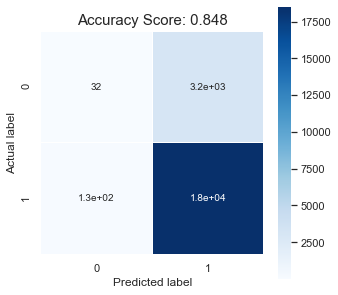

In [150]:
cm_BoW = confusion_matrix(y_test_A, y_pred_BoW)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm_BoW,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(dtree_BoW.score(X_test_BoW, y_test_A),3))
plt.title(all_sample_title, size = 15)

<a class="anchor" id="section_4_4"></a>

<font color='blue'><center><h2> Decision Tree Model Visualization - BoW </h2></center>

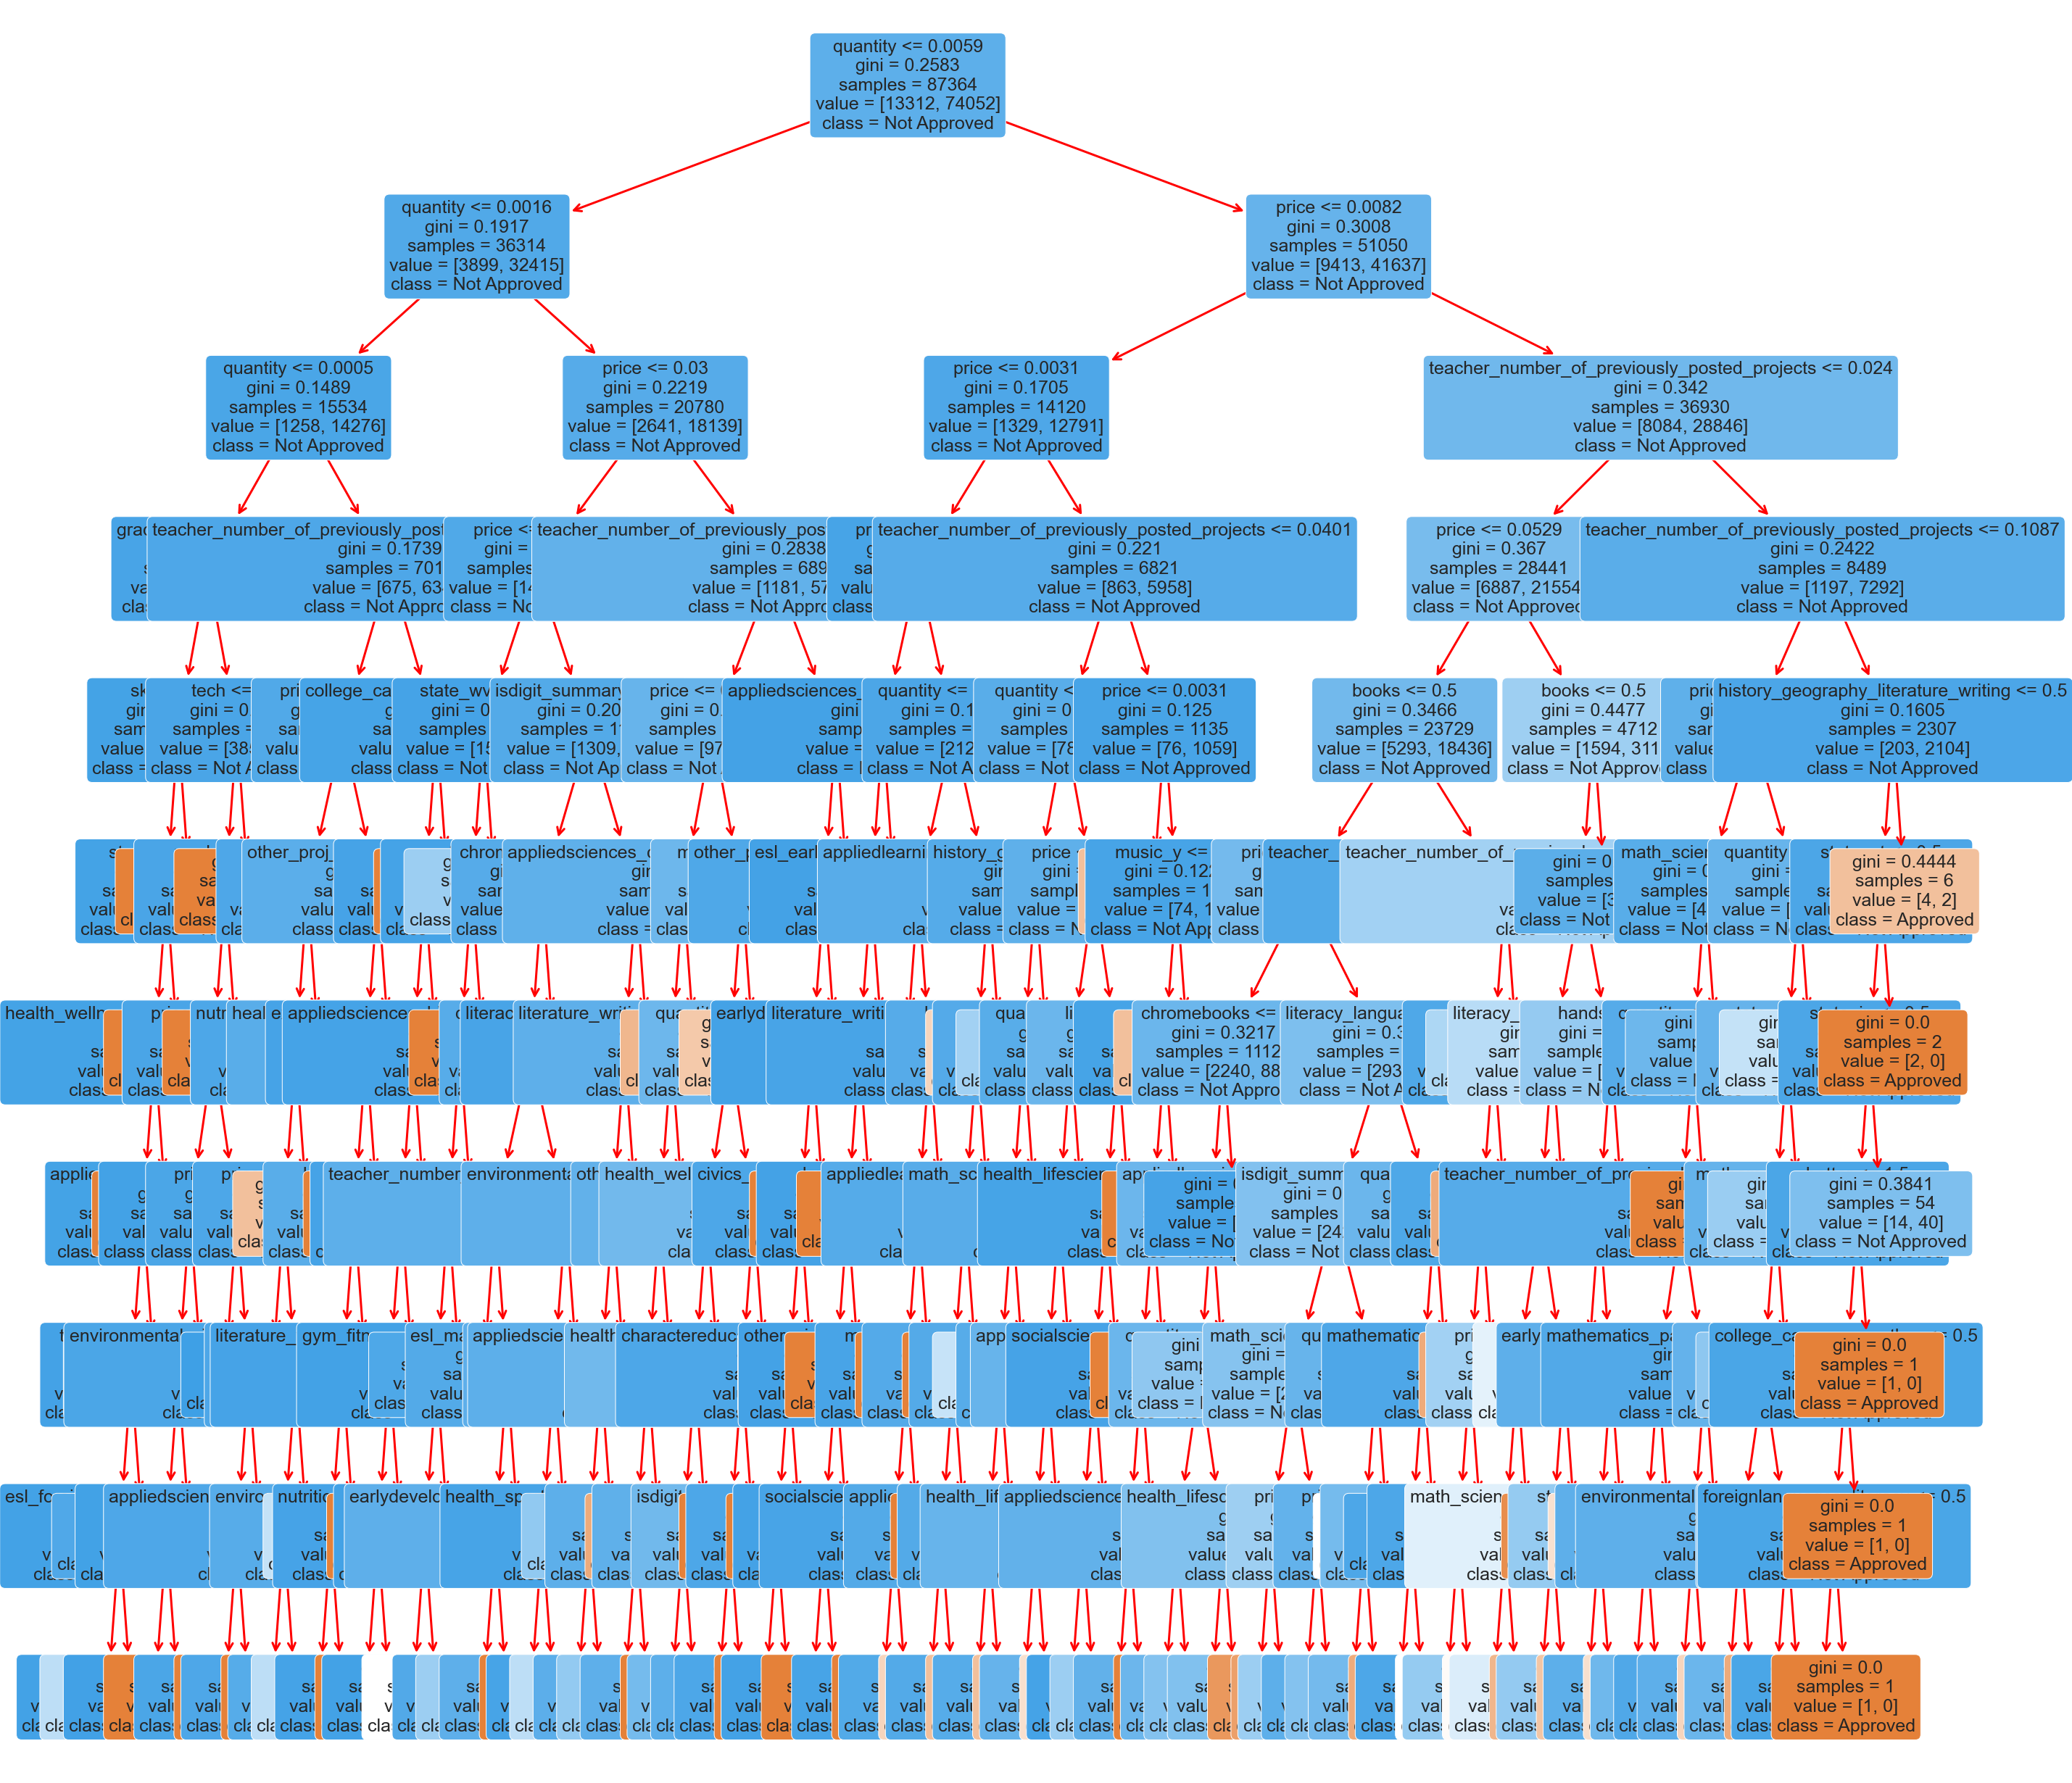

In [151]:
# Visualising the graph without the use of graphviz
fig_tree_BoW, ax_tree_BoW = plt.subplots(figsize=(45,45))
dec_tree_BoW = plot_tree(decision_tree=dtree_BoW, feature_names = X_train_BoW.columns, class_names =["Approved", "Not Approved"], 
            fontsize=25, filled = True , precision = 4, rounded = True)
#out = tree.plot_tree(clf)
for o in dec_tree_BoW:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

<a class="anchor" id="section_4_5"></a>

<font color='blue'><center><h2> Visualize AUC Curve - BoW </h2></center>

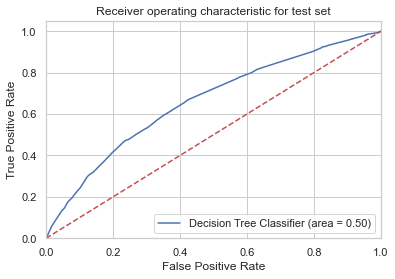

In [174]:
# Visualize the ROC Curve for the test data

roc_auc_BoW = roc_auc_score(y_test_A, dtree_BoW.predict(X_test_BoW))
fpr_BoW, tpr_BoW, thresholds_BoW = roc_curve(y_test_A, dtree_BoW.predict_proba(X_test_BoW)[:,1])
plt.figure()
plt.plot(fpr_BoW, tpr_BoW, label='Decision Tree Classifier (area = %0.2f)' % roc_auc_BoW)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test set')
plt.legend(loc="lower right")
plt.savefig('DTree_ROC')
plt.show()

<a class="anchor" id="section_4_6"></a>

<font color='blue'><center><h2> Hyperparameter Tuning - BoW </h2></center>

In [223]:
model_tree_A = DecisionTreeClassifier()
model_tree_A.fit(X_train_BoW,y_train_A)

param_dict = {"criterion":['gini'], "max_depth":[5,10,50], "min_samples_split":[10,100,500]}
grid_BoW = GridSearchCV(model_tree_A,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1,scoring='roc_auc')
grid_BoW.fit(X_train_BoW,y_train_A)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.6min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10, 50],
                         'min_samples_split': [10, 100, 500]},
             scoring='roc_auc', verbose=1)

In [224]:
print("The best parameters for BoW model are: ", grid_BoW.best_params_)
print("The best estimator is: ", grid_BoW.best_estimator_)
print("The best ROC score on training data is: ", grid_BoW.best_score_)
print("The ROC score on test data is: ", roc_auc_BoW)

The best parameters for BoW model are:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 500}
The best estimator is:  DecisionTreeClassifier(max_depth=10, min_samples_split=500)
The best ROC score on training data is:  0.6676264105010083
The ROC score on test data is:  0.5015172401602065


<b><u> Inferences/Observations: </b></u> 
<ul style="list-style-type:disc"> 
<li> Best parameters are 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 500. </li>
<li> Best score for accuracy is ~85%. </li>
<li> The BoW model has very limited capability to categorize true negatives. The type of error made by the model is Type-1 error. </li></ul>

<a class="anchor" id="chapter5"></a>

<font color='purple'><center><h1> Case 2: Model Building and Performance Evaluation - TF-IDF </h1></center>

<a class="anchor" id="section_5_1"></a>

<font color='blue'><center><h2> Model Building - TF-IDF </h2></center>

In [170]:
# Defining the decision tree algorithm
dtree_tfidf = DecisionTreeClassifier(max_depth=10, min_samples_split=500)
dtree_tfidf.fit(X_train_TFIDF, y_train_B)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


<a class="anchor" id="section_5_2"></a>

<font color='blue'><center><h2> Performance Evaluation - TF-IDF </h2></center>

In [171]:
# Predicting the values of test data
y_pred_TFIDF = dtree_tfidf.predict(X_test_TFIDF)
print("Classification report - \n", classification_report(y_test_B, y_pred_TFIDF))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.20      0.01      0.02      3213
         1.0       0.85      0.99      0.92     18628

    accuracy                           0.85     21841
   macro avg       0.53      0.50      0.47     21841
weighted avg       0.76      0.85      0.79     21841



<a class="anchor" id="section_5_4"></a>

<a class="anchor" id="section_5_3"></a>

<font color='blue'><center><h2> Confusion Matrix - TF-IDF </h2></center>

Text(0.5, 1.0, 'Accuracy Score: 0.848')

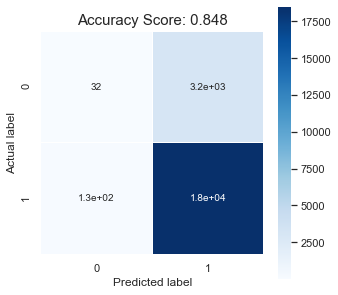

In [172]:
cm_TFIDF = confusion_matrix(y_test_B, y_pred_TFIDF)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm_TFIDF, linewidths=.5, annot=True, square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(dtree_tfidf.score(X_test_TFIDF, y_test_B),3))
plt.title(all_sample_title, size = 15)

<a class="anchor" id="section_5_4"></a>

<font color='blue'><center><h2> Decision Tree Model Visualization - TF-IDF </h2></center>

In [173]:
# Visualising the graph without the use of graphviz
fig_tree_TFIDF, ax_tree_TFIDF = plt.subplots(figsize=(45,45))
dec_tree_TFIDF = plot_tree(decision_tree=dtree_tfidf, feature_names = X_train_TFIDF.columns, class_names =["Approved", "Not Approved"], 
            fontsize=25, filled = True , precision = 4, rounded = True)
#out = tree.plot_tree(clf)
for o in dec_tree_TFIDF:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

<<a class="anchor" id="section_5_5"></a>

<font color='blue'><center><h2> Visualize AUC Curve - TF-IDF </h2></center>

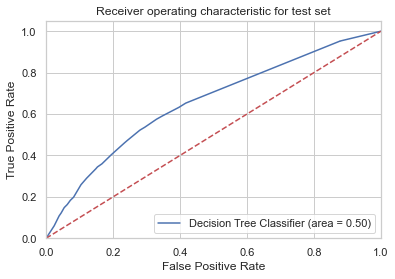

In [165]:
# Visualize the ROC Curve for the test data

roc_auc_TFIDF = roc_auc_score(y_test_B, dtree_tfidf.predict(X_test_TFIDF))
fpr_TFIDF, tpr_TFIDF, thresholds_TFIDF = roc_curve(y_test_B, dtree_tfidf.predict_proba(X_test_TFIDF)[:,1])
plt.figure()
plt.plot(fpr_TFIDF, tpr_TFIDF, label='Decision Tree Classifier (area = %0.2f)' % roc_auc_TFIDF)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test set')
plt.legend(loc="lower right")
plt.savefig('DTree_ROC')
plt.show()

<a class="anchor" id="section_5_6"></a>

<font color='blue'><center><h2> Hyperparameter Tuning - TF-IDF - All features </h2></center>

In [225]:
model_tree_B = DecisionTreeClassifier()
model_tree_B.fit(X_train_TFIDF,y_train_B)

param_dict = {"criterion":['gini'], "max_depth":[5,10,50], "min_samples_split":[10,100,500]}
grid_TFIDF = GridSearchCV(model_tree_B,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1,scoring='roc_auc')
grid_TFIDF.fit(X_train_TFIDF,y_train_B)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.9min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10, 50],
                         'min_samples_split': [10, 100, 500]},
             scoring='roc_auc', verbose=1)

In [226]:
print("The best parameters for TFIDF model are: ", grid_TFIDF.best_params_)
print("The best estimator is: ", grid_TFIDF.best_estimator_)
print("The best ROC score on training data is: ", grid_TFIDF.best_score_)
print("The ROC score on test data is: ", roc_auc_TFIDF)

The best parameters for TFIDF model are:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 500}
The best estimator is:  DecisionTreeClassifier(max_depth=10, min_samples_split=500)
The best ROC score on training data is:  0.6676201574049313
The ROC score on test data is:  0.49994631737169853


<b><u> Inferences/Observations: </b></u> 
<ul style="list-style-type:disc"> 
<li> Best parameters are 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 500. </li>
<li> Best score for accuracy is ~85%. </li>
<li> The BoW model has very limited capability to categorize true negatives. The type of error made by the model is Type-1 error. </li></ul>

<a class="anchor" id="section_5_7"></a>

<font color='blue'><center><h2> Find Features with Non-Zero Importance </h2></center>

In [203]:
# Take copies of train and test datasets
X_train_TFIDF_nonzero = X_train_TFIDF.copy(deep=True)
X_test_TFIDF_nonzero = X_test_TFIDF.copy(deep=True)

In [204]:
X_train_TFIDF_nonzero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87364 entries, 25934 to 98579
Columns: 560 entries, teacher_number_of_previously_posted_projects to school not
dtypes: float16(3), float32(505), uint8(52)
memory usage: 176.3 MB


In [205]:
X_test_TFIDF_nonzero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21841 entries, 2654 to 37570
Columns: 560 entries, teacher_number_of_previously_posted_projects to school not
dtypes: float32(505), float64(3), uint8(52)
memory usage: 44.4 MB


In [206]:
# Collect feature importance data
feat_imp = list(zip(X_train_TFIDF_nonzero.columns, model_tree_B.feature_importances_))
feat_imp[:10]

[('teacher_number_of_previously_posted_projects', 0.06688186266064435),
 ('price', 0.15820389724424916),
 ('quantity', 0.08779108604898521),
 ('isdigit_summary', 0.008756265811703952),
 ('state_ak', 0.0007811908388917211),
 ('state_al', 0.00266319827371785),
 ('state_ar', 0.002492393117821233),
 ('state_az', 0.003301185723016791),
 ('state_ca', 0.012043463466477838),
 ('state_co', 0.0024854357766699703)]

In [207]:
i = 0
i_lim = len(feat_imp)

while i < i_lim:
    # drop features with ~zero importance 
    if feat_imp[i][1] < 0.0001:
        drop_col = feat_imp[i][0]
        X_train_TFIDF_nonzero = X_train_TFIDF_nonzero.drop([drop_col], axis=1)
        X_test_TFIDF_nonzero = X_test_TFIDF_nonzero.drop([drop_col], axis=1)
    else:
        pass
    i = i + 1

In [208]:
X_train_TFIDF_nonzero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87364 entries, 25934 to 98579
Columns: 394 entries, teacher_number_of_previously_posted_projects to organization
dtypes: float16(3), float32(339), uint8(52)
memory usage: 121.0 MB


In [209]:
X_test_TFIDF_nonzero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21841 entries, 2654 to 37570
Columns: 394 entries, teacher_number_of_previously_posted_projects to organization
dtypes: float32(339), float64(3), uint8(52)
memory usage: 30.6 MB


<a class="anchor" id="section_5_8"></a>

<font color='blue'><center><h2> Model Building and Evaluation - TF-IDF - Non-Zero features </h2></center>

In [212]:
# Defining the decision tree algorithm
dtree_tfidf_nonzero = DecisionTreeClassifier(max_depth=5, min_samples_split=100)
dtree_tfidf_nonzero.fit(X_train_TFIDF_nonzero, y_train_B)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [213]:
# Predicting the values of test data
y_pred_TFIDF_nonzero = dtree_tfidf_nonzero.predict(X_test_TFIDF_nonzero)
print("Classification report - \n", classification_report(y_test_B, y_pred_TFIDF_nonzero))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3213
         1.0       0.85      1.00      0.92     18628

    accuracy                           0.85     21841
   macro avg       0.43      0.50      0.46     21841
weighted avg       0.73      0.85      0.79     21841



Text(0.5, 1.0, 'Accuracy Score: 0.853')

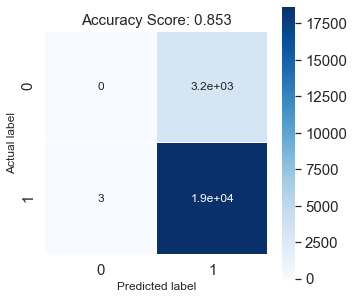

In [214]:
cm_TFIDF_nonzero = confusion_matrix(y_test_B, y_pred_TFIDF_nonzero)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm_TFIDF_nonzero, linewidths=.5, annot=True, square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(dtree_tfidf_nonzero.score(X_test_TFIDF_nonzero, y_test_B),3))
plt.title(all_sample_title, size = 15)

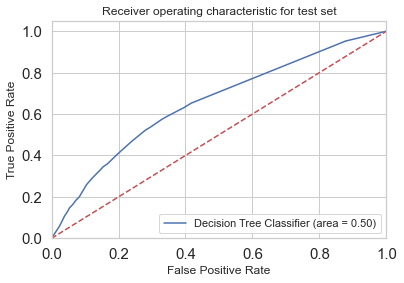

In [215]:
# Visualize the ROC Curve for the test data

roc_auc_TFIDF_nonzero = roc_auc_score(y_test_B, dtree_tfidf_nonzero.predict(X_test_TFIDF_nonzero))
fpr_TFIDF_nonzero, tpr_TFIDF_nonzero, thresholds_TFIDF_nonzero = roc_curve(y_test_B, dtree_tfidf_nonzero.predict_proba(X_test_TFIDF_nonzero)[:,1])
plt.figure()
plt.plot(fpr_TFIDF_nonzero, tpr_TFIDF_nonzero, label='Decision Tree Classifier (area = %0.2f)' % roc_auc_TFIDF_nonzero)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for test set')
plt.legend(loc="lower right")
plt.savefig('DTree_ROC')
plt.show()

<a class="anchor" id="section_5_9"></a>

<font color='blue'><center><h2> Hyperparameter Tuning - TF-IDF - Non-zero Features </h2></center>

In [ ]:
model_tree_B_nonzero = DecisionTreeClassifier()
model_tree_B_nonzero.fit(X_train_TFIDF_nonzero,y_train_B)

param_dict = {"criterion":['gini'], "max_depth":[5,10,50], "min_samples_split":[10,100,500]}
grid_TFIDF_nonzero = GridSearchCV(model_tree_B_nonzero,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1,scoring='roc_auc')
grid_TFIDF_nonzero.fit(X_train_TFIDF_nonzero,y_train_B)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min


In [ ]:
print("The best parameters for TFIDF model with non-zero features are: ", grid_TFIDF_nonzero.best_params_)
print("The best estimator is: ", grid_TFIDF_nonzero.best_estimator_)
print("The best ROC score on training data is: ", grid_TFIDF_nonzero.best_score_)
print("The ROC score on test data is: ", roc_auc_TFIDF_nonzero)

In [218]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 500}

In [219]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=500)

In [220]:
grid.best_score_

0.6675391542747903

<a class="anchor" id="chapter6"></a>

<font color='purple'><center><h1> Tabulate Results and Observations  </h1></center>

In [221]:
# Store data into a list and convert to a dataframe
result_data = [['BoW', 'DT', 10, roc_auc_BoW], ['TFIDF', 'DT', 10, roc_auc_TFIDF], ['TF_IDF Non-Zero', 'DT', 10, roc_auc_TFIDF_nonzero]]
df_results = pd.DataFrame(result_data, columns=['Vectorizer', 'Model', 'Hyper parameter-max depth', 'Test AUC'])

In [222]:
# Print Results in required Format
df_results

Vectorizer Model  Hyper parameter-max depth  Test AUC
0              BoW    DT                          0         0
1            TFIDF    DT                          0         0
2  TF_IDF Non-Zero    DT                          0         0

In [ ]:
<b><u> Inferences/Observations: </b></u> 
<ul style="list-style-type:disc"> 
<li> Best parameters are 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 500 for all models. </li>
<li> Best score for accuracy is ~85%. This is not a big deal considering that ~85% of the projects are approved. 
If the model predicts that all projects should be approved, we would still get around the same accuracy.</li>
<li> ROC Score for all cases is similar - ~67% for training data and ~50% for test data. 
This is okay but is not useful enough for production. </li>
<li> The models have very limited capability to categorize true negatives. The type of error made by the model is Type-1 error. 
This error is substantial.</li>
<li> The root of most of these issues is the imbalanced dataset. 
We can mitigate a lot of the issues by either balancing the dataset 
or creating a model that primarily focuses on Project not approved category. 
Another approach would be to use limited number of records to balance the dataset. 
But this has the disadvantage of losing information and may not be a good idea for this type of problems.
None of this is part of the question and the current assignment is already work-intensive. 
Hence, we are excluding these alternatives but identifying the same. </li>
<li> Another major limitation was the size of the dataset when one-hot encoded. Without optimizations, this leads to overflow errors.
We have optimized this by manipulating the column datatypes. 
If we use an environment with more processing power, more features can be analyzed and the model can be further optimized. </li>
<li> In order to illustrate expertise and judgement, title column was split as single words and .</li></ul>